# Pisa 2012 Data Exploration
### by Youssef Ahmed Khattab

This NoteBook will be devoted to investigating subtleties of the PISA 2012 dataset. PISA, specifically, is a "overview of understudies' abilities and information as they approach the finish of obligatory schooling. It's anything but a traditional school test. As opposed to analyzing how well understudies have taken in the school educational plan, it sees how solid and steady they are for life beyond school"

Within this datset we can find information around 510 000 students between the ages of 15 years 3 months and 16 years 2 months participated in PISA 2012 as a whole representing about 28 million 15-year-olds globally. 


Throughout the course of this notebook I will have these two questions in mind:

- Are there contrasts in accomplishment dependent on gender or parental education levels?
- Is there a connection between the measure of time a student dedicates to learning and their score? 

### Preliminary Wrangling

To begin, let's start off by assessing the dataset and cleaning any remaining issues.

In [1]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
pisa = pd.read_csv('pisa_wrg.csv')
pisa.head()

Country  Student ID  Gender  Out-of-School Study Time - Homework  \
0   Italy        4711  Female                                 22.0   
1   Italy        4508    Male                                  9.0   
2   Italy        4473    Male                                 13.0   
3   Italy        4460  Female                                 18.0   
4   Italy        3971    Male                                 21.0   

   Out-of-School Study Time - Guided Homework  \
0                                         2.0   
1                                         2.0   
2                                         2.0   
3                                         0.0   
4                                         0.0   

   Out-of-School Study Time - Personal Tutor  \
0                                        0.0   
1                                        1.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   Out-of-School Study Time - Commercial Company  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

   Out-of-School Study Time - With Parent  Learning Time - Mathematics  \
0                                     0.0                        220.0   
1                                     1.0                        232.0   
2                                     2.0                        200.0   
3                                     1.0                        200.0   
4                                    10.0                        180.0   

   Learning Time - Test Language  Learning Time - Science  Average_Math_Score  \
0                          220.0                    110.0           546.58826   
1                          348.0                    232.0           546.82192   
2                          450.0                    100.0           614.20002   
3                          250.0                    100.0           646.83754   
4                          240.0                    120.0           550.32716   

   Average_Reading_Score  Average_Science_Score  Average_Total_Score  \
0              600.74068              542.83850           563.389147   
1              530.94960              580.79074           552.854087   
2              661.18546              667.60536           647.663613   
3              701.85636              705.83738           684.843760   
4              621.08820              688.86610           620.093820   

         Education - Father        Education - Mother  \
0  Bachelor’s or equivalent  Bachelor’s or equivalent   
1  Bachelor’s or equivalent  Bachelor’s or equivalent   
2  Bachelor’s or equivalent  Bachelor’s or equivalent   
3  Bachelor’s or equivalent  Bachelor’s or equivalent   
4  Bachelor’s or equivalent  Bachelor’s or equivalent   

   Out-of-School Study Time - Total  Learning Time - Total  
0                              24.0                  550.0  
1                              13.0                  812.0  
2                              17.0                  750.0  
3                              19.0                  550.0  
4                              31.0                  540.0

### Evaluating and Cleaning the data

In [3]:
pisa.shape

(24168, 19)

In [4]:
pisa.dtypes

Country                                           object
Student ID                                         int64
Gender                                            object
Out-of-School Study Time - Homework              float64
Out-of-School Study Time - Guided Homework       float64
Out-of-School Study Time - Personal Tutor        float64
Out-of-School Study Time - Commercial Company    float64
Out-of-School Study Time - With Parent           float64
Learning Time - Mathematics                      float64
Learning Time - Test Language                    float64
Learning Time - Science                          float64
Average_Math_Score                               float64
Average_Reading_Score                            float64
Average_Science_Score                            float64
Average_Total_Score                              float64
Education - Father                                object
Education - Mother                                object
Out-of-School Study Time - Tota

In [5]:
pisa.sample(10)

Country  Student ID  Gender  \
1607   United Arab Emirates       11043  Female   
15299                 Spain       14599  Female   
21104                 Italy       28691  Female   
19638               Finland        5584    Male   
12726                Canada       18142    Male   
17941                Canada       12609  Female   
12846                Canada       16481    Male   
23238               Romania        3662  Female   
2805                Iceland        2589  Female   
16014                Brazil        1886    Male   

       Out-of-School Study Time - Homework  \
1607                                  28.0   
15299                                  2.0   
21104                                  2.0   
19638                                  1.0   
12726                                  5.0   
17941                                  8.0   
12846                                  2.0   
23238                                  5.0   
2805                                   1.0   
16014                                  3.0   

       Out-of-School Study Time - Guided Homework  \
1607                                         16.0   
15299                                         0.0   
21104                                         2.0   
19638                                         0.0   
12726                                         4.0   
17941                                         1.0   
12846                                         2.0   
23238                                         2.0   
2805                                          1.0   
16014                                         2.0   

       Out-of-School Study Time - Personal Tutor  \
1607                                         7.0   
15299                                        0.0   
21104                                        0.0   
19638                                        0.0   
12726                                        1.0   
17941                                        0.0   
12846                                        0.0   
23238                                        0.0   
2805                                         0.0   
16014                                        1.0   

       Out-of-School Study Time - Commercial Company  \
1607                                             4.0   
15299                                            0.0   
21104                                            0.0   
19638                                            0.0   
12726                                            1.0   
17941                                            0.0   
12846                                            0.0   
23238                                            0.0   
2805                                             0.0   
16014                                            2.0   

       Out-of-School Study Time - With Parent  Learning Time - Mathematics  \
1607                                      7.0                        250.0   
15299                                     0.0                        180.0   
21104                                     2.0                        240.0   
19638                                     0.0                        120.0   
12726                                     0.0                        375.0   
17941                                     0.0                        408.0   
12846                                     0.0                        450.0   
23238                                     0.0                        240.0   
2805                                      1.0                        200.0   
16014                                     1.0                        150.0   

       Learning Time - Test Language  Learning Time - Science  \
1607                           250.0                    200.0   
15299                          180.0                    135.0   
21104                          360.0                    120.0   
19638                          180.0                    12

In [6]:
pisa.describe()

Student ID  Out-of-School Study Time - Homework  \
count  24168.000000                         24168.000000   
mean   13106.692486                             6.811610   
std     8294.946498                             5.984246   
min        1.000000                             0.000000   
25%     6043.750000                             2.000000   
50%    12251.500000                             5.000000   
75%    19559.250000                            10.000000   
max    31071.000000                            30.000000   

       Out-of-School Study Time - Guided Homework  \
count                                24168.000000   
mean                                     1.412777   
std                                      2.486527   
min                                      0.000000   
25%                                      0.000000   
50%                                      1.000000   
75%                                      2.000000   
max                                     30.000000   

       Out-of-School Study Time - Personal Tutor  \
count                               24168.000000   
mean                                    0.758358   
std                                     1.807041   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     1.000000   
max                                    30.000000   

       Out-of-School Study Time - Commercial Company  \
count                                   24168.000000   
mean                                        0.587347   
std                                         1.759952   
min                                         0.000000   
25%                                         0.000000   
50%                                         0.000000   
75%                                         0.000000   
max                                        30.000000   

       Out-of-School Study Time - With Parent  Learning Time - Mathematics  \
count                            24168.000000                 24168.000000   
mean                                 0.971946                   238.321706   
std                                  2.024808                    85.956337   
min                                  0.000000                     0.000000   
25%                                  0.000000                   180.000000   
50%                                  0.000000                   225.000000   
75%                                  1.000000                   275.000000   
max                                 30.000000                  1260.000000   

       Learning Time - Test Language  Learning Time - Science  \
count                   24168.000000             24168.000000   
mean                      242.401399               209.072782   
std                        89.875466               127.052213   
min                         0.000000                 0.000000   
25%                       180.000000               120.000000   
50%                       225.000000               180.000000   
75%                       275.000000               275.000000   
max                      1530.000000              2250.000000   

       Average_Math_Score  Average_Reading_Score  Average_Science_Score  \
count        24168.000000           24168.000000           24168.000000   
mean           519.257862             519.784153             525.112430   
std             88.623659              86.642298              86.234264   
min            130.059220             113.136180             144.479680   
25%            457.789380             464.584075             467.120475   
50%            520.727520             524.774600             528.757920   
75%            580.861505             580.644640             585.919420   
max            891.969140             793.916900             834.800440   

       Average_Total_Score  Out-of-School Study Tim

In [7]:
pisa['Education - Father'].value_counts()

Short-cycle tertiary        9987
Bachelor’s or equivalent    5639
Upper secondary             3267
Lower secondary             2385
Post-secondary              2300
Primary                      464
Early childhood              126
Name: Education - Father, dtype: int64

In [8]:
pisa['Education - Mother'].value_counts()

Short-cycle tertiary        10185
Upper secondary              4791
Lower secondary              3057
Bachelor’s or equivalent     2725
Post-secondary               2646
Primary                       588
Early childhood               176
Name: Education - Mother, dtype: int64

In [9]:
# Convert level of education into ordered categorical
ordinal_var_dict = {'Education - Father': ['Early childhood', 'Primary', 'Lower secondary', 'Upper secondary', 'Post-secondary', 'Short-cycle tertiary', 'Bachelor’s or equivalent'],
                    'Education - Mother': ['Early childhood', 'Primary', 'Lower secondary', 'Upper secondary', 'Post-secondary', 'Short-cycle tertiary', 'Bachelor’s or equivalent']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    pisa[var] = pisa[var].astype(ordered_var)

In [10]:
pisa['Student ID'].duplicated().sum()

0

In [11]:
pisa.drop_duplicates(inplace=True)

In [12]:
pisa.duplicated().sum()

0

In [13]:
pisa.shape

(24168, 19)

### What is the structure of your dataset?

There are 485,490 students covered in the dataset with 635 features. 68 countries are represented

### What is/are the main feature(s) of interest in your dataset?

- The main feature that we will be investigate is the 'Average_Total_Score'

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- To all the more likely comprehen the Average Total Score
- The average assumption is that the more homework a student completes
I anticipate that the instructive level of the guardians, and the measure of books that they have in their home will be a superior component to foresee the understudy's test related achievement.


## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: 

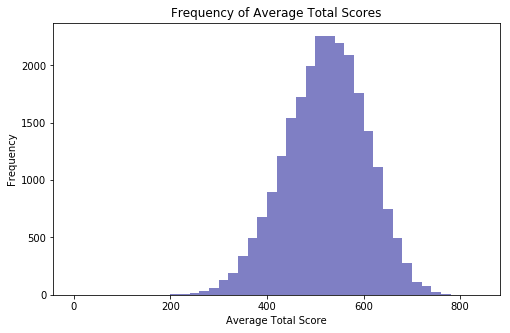

In [14]:
# Histogram of Average Total Score
plt.figure(figsize=[8, 5])
binSize = 20
bins = np.arange(0, pisa['Average_Total_Score'].max()+binSize, binSize)
plt.hist(data = pisa, x = 'Average_Total_Score', bins = bins, color = 'darkblue', alpha=0.5)
plt.xlabel('Average Total Score')
plt.ylabel('Frequency')
plt.title('Frequency of Average Total Scores');

Here we can see that it is a extremely ordinary appropriation This is generally not surprising since bell curves are expected when it comes to the grades of students.

We can now move onto the three scores that the total score is comprised of: Math, Reading, and Science.

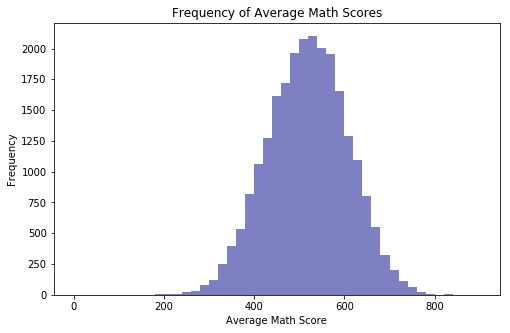

In [15]:
# Histogram of Average Math Score
plt.figure(figsize=[8, 5])
binSize = 20
bins = np.arange(0, pisa['Average_Math_Score'].max()+binSize, binSize)
plt.hist(data = pisa, x = 'Average_Math_Score', bins = bins, color = 'darkblue', alpha=0.5)
plt.xlabel('Average Math Score')
plt.ylabel('Frequency')
plt.title('Frequency of Average Math Scores');

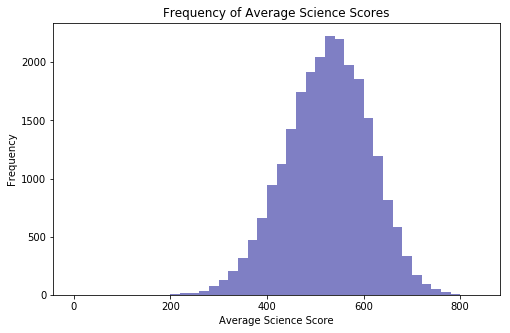

In [16]:
# Histogram of Average Science Score
plt.figure(figsize=[8, 5])
binSize = 20
bins = np.arange(0, pisa['Average_Science_Score'].max()+binSize, binSize)
plt.hist(data = pisa, x = 'Average_Science_Score', bins = bins, color = 'darkblue', alpha=0.5)
plt.xlabel('Average Science Score')
plt.ylabel('Frequency')
plt.title('Frequency of Average Science Scores');

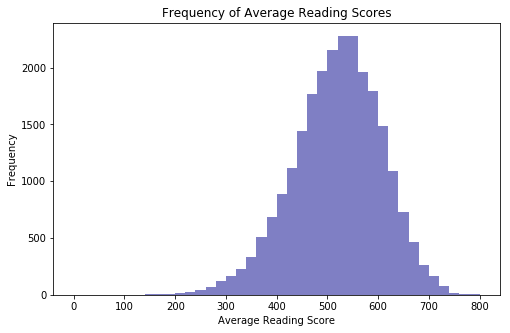

In [17]:
# Histogram of Average Reading Score
plt.figure(figsize=[8, 5])
binSize = 20
bins = np.arange(0, pisa['Average_Reading_Score'].max()+binSize, binSize)
plt.hist(data = pisa, x = 'Average_Reading_Score', bins = bins, color = 'darkblue', alpha=0.5)
plt.xlabel('Average Reading Score')
plt.ylabel('Frequency')
plt.title('Frequency of Average Reading Scores');

We can undoubtedly say all of this distributions is very much so like the total score in that it has a distinct normal distribution

Now we can shift onto study time vars.

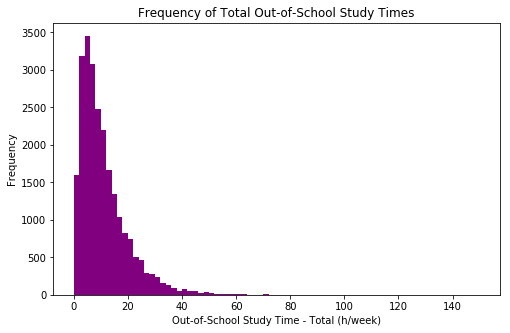

In [18]:
# Histogram of the Total Out-of-School Study Time
plt.figure(figsize=[8, 5])
binsize = 2 # set 2 here more reliable and displayed
bins = np.arange(0, pisa['Out-of-School Study Time - Total'].max()+binsize, binsize)

plt.hist(data = pisa, x = 'Out-of-School Study Time - Total', color = 'purple', bins = bins)

plt.xlabel('Out-of-School Study Time - Total (h/week)')
plt.ylabel('Frequency')
plt.title('Frequency of Total Out-of-School Study Times');

we can see a strong right skew on this unimodal distribution. Due to the tail that extends past the peak,therfore
2 bins not enough to display the differ in sacles we should look at this variable on a smaller scale.

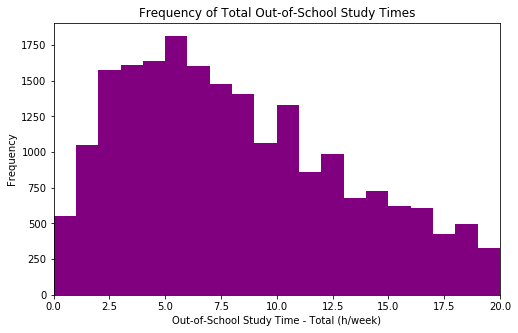

In [19]:
# Histogram of the Total Out-of-School Study Time
plt.figure(figsize=[8, 5])
binsize = 1 # smallest bin.
bins = np.arange(0, pisa['Out-of-School Study Time - Total'].max()+binsize, binsize)

plt.hist(data = pisa, x = 'Out-of-School Study Time - Total', color = 'purple', bins = bins)

plt.xlim(0,20)
plt.xlabel('Out-of-School Study Time - Total (h/week)')
plt.ylabel('Frequency')
plt.title('Frequency of Total Out-of-School Study Times');

Now we can take a look closer in each variable ['Out-of-School Study Time - Homework', 'Out-of-School Study Time - Guided Homework', 'Out-of-School Study Time - Personal Tutor', 'Out-of-School Study Time - Commercial Company', 'Out-of-School Study Time - With Parent']

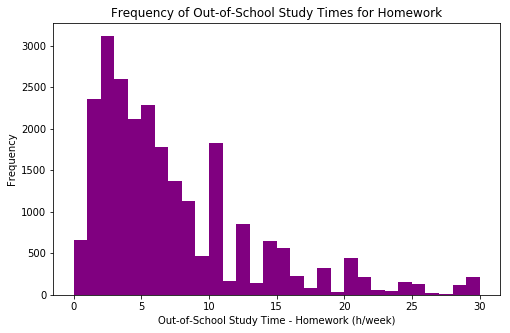

In [20]:
# Histogram of the Out-of-School Study Time for Homework
binsize = 1 # Smallest and reliable bin size
plt.figure(figsize=[8, 5])
bins = np.arange(0, pisa['Out-of-School Study Time - Homework'].max()+binsize, binsize)

plt.hist(data = pisa, x = 'Out-of-School Study Time - Homework', color = 'purple', bins = bins)

plt.xlabel('Out-of-School Study Time - Homework (h/week)')
plt.ylabel('Frequency')
plt.title('Frequency of Out-of-School Study Times for Homework');

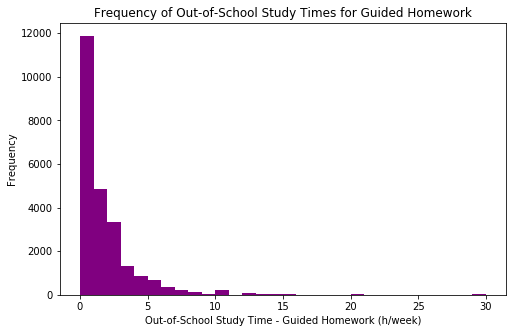

In [21]:
# Histogram of the Out-of-School Study Time for Guided Homework
binsize = 1 # Smallest and reliable bin size
plt.figure(figsize=[8, 5])

bins = np.arange(0, pisa['Out-of-School Study Time - Guided Homework'].max()+binsize, binsize)

plt.hist(data = pisa, x = 'Out-of-School Study Time - Guided Homework', color = 'purple', bins = bins)

plt.xlabel('Out-of-School Study Time - Guided Homework (h/week)')
plt.ylabel('Frequency')
plt.title('Frequency of Out-of-School Study Times for Guided Homework');

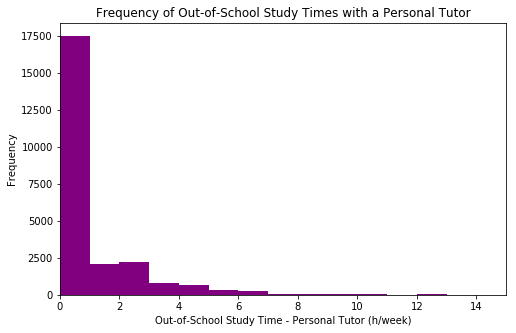

In [22]:
# Histogram of the Out-of-School Study Time with a Personal Tutor
binsize = 1 # Smallest and reliable bin size
plt.figure(figsize=[8, 5])

bins = np.arange(0, pisa['Out-of-School Study Time - Personal Tutor'].max()+binsize, binsize)

plt.hist(data = pisa, x = 'Out-of-School Study Time - Personal Tutor', color = 'purple', bins = bins)

plt.xlim(0,15)
plt.xlabel('Out-of-School Study Time - Personal Tutor (h/week)')
plt.ylabel('Frequency')
plt.title('Frequency of Out-of-School Study Times with a Personal Tutor');

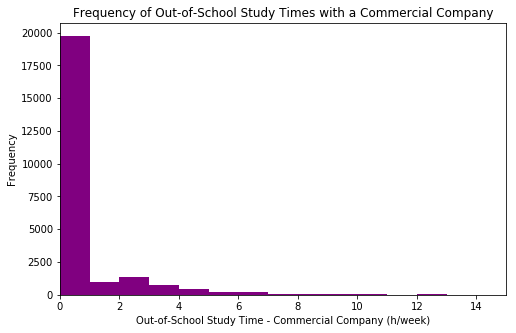

In [23]:
# Histogram of the Out-of-School Study Time with a Commercial Company
binsize = 1 # Smallest and reliable bin size
plt.figure(figsize=[8, 5])

bins = np.arange(0, pisa['Out-of-School Study Time - Commercial Company'].max()+binsize, binsize)

plt.hist(data = pisa, x = 'Out-of-School Study Time - Commercial Company', color = 'purple', bins = bins)

plt.xlim(0,15)
plt.xlabel('Out-of-School Study Time - Commercial Company (h/week)')
plt.ylabel('Frequency')
plt.title('Frequency of Out-of-School Study Times with a Commercial Company');

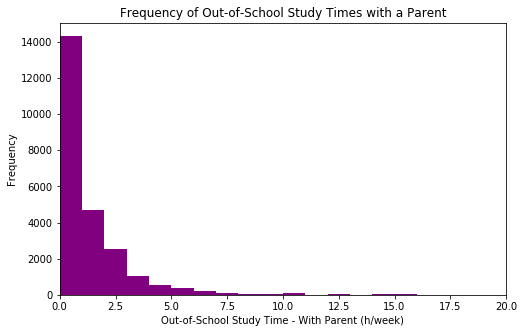

In [24]:
# Histogram of the Out-of-School Study Time with a Parent
binsize = 1
plt.figure(figsize=[8, 5])

bins = np.arange(0, pisa['Out-of-School Study Time - With Parent'].max()+binsize, binsize)

plt.hist(data = pisa, x = 'Out-of-School Study Time - With Parent', color = 'purple', bins = bins)

plt.xlim(0,20)
plt.xlabel('Out-of-School Study Time - With Parent (h/week)')
plt.ylabel('Frequency')
plt.title('Frequency of Out-of-School Study Times with a Parent');

Every one of the above histograms for Out-of-School Study Time reflected precisely what we found in the Total Out-of-School Study Time histogram. They are altogether unequivocally left skewed unimodal distribution, which isn't a very remarkable amazement since understudies commonly put in some Investigation Time outside of school, yet the measure of time an understudy can commit to examining drops from there on.

Shift to learning time distributions

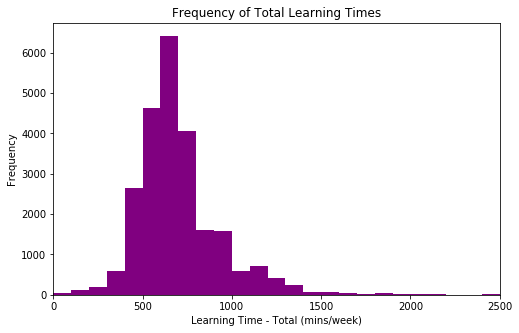

In [25]:
# Histogram of the Total Learning Time
binsize = 100
plt.figure(figsize=[8, 5])

bins = np.arange(0, pisa['Learning Time - Total'].max()+binsize, binsize)

plt.hist(data = pisa, x = 'Learning Time - Total', color = 'purple', bins=bins)
plt.xlim(0, 2500)
plt.xlabel('Learning Time - Total (mins/week)')
plt.ylabel('Frequency')
plt.title('Frequency of Total Learning Times');

Although marginally skewed to the right, this distribution is significantly more typical on the off chance that we contrast with the Out-of-School Study Time distribution.
In any case, to comprehend Learning Time, 

we should investigate every one of the subjects.

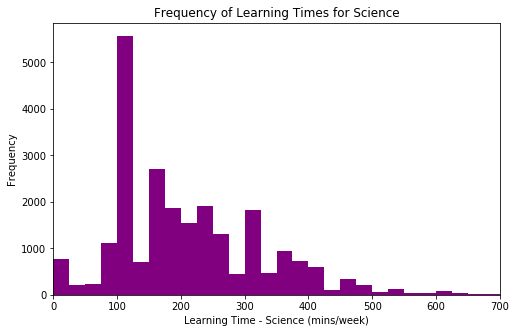

In [26]:
# Histogram of the Science Learning Time
binsize = 25
plt.figure(figsize=[8, 5])

bins = np.arange(0, pisa['Learning Time - Science'].max()+binsize, binsize)

plt.hist(data = pisa, x = 'Learning Time - Science', color = 'purple', bins=bins)

plt.xlim(0, 700)
plt.xlabel('Learning Time - Science (mins/week)')
plt.ylabel('Frequency')
plt.title('Frequency of Learning Times for Science');

On the other hand, shows a different story. For Science we can see a clear right skew.

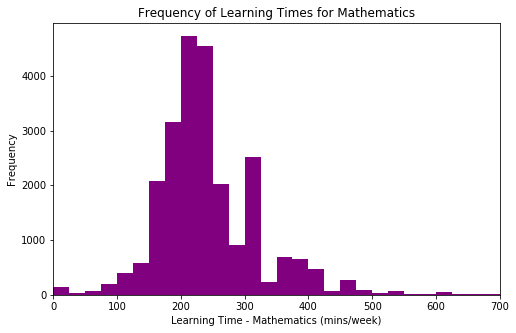

In [27]:
# Histogram of the Mathematics Learning Time
binsize = 25
plt.figure(figsize=[8, 5])

bins = np.arange(0, pisa['Learning Time - Mathematics'].max()+binsize, binsize)

plt.hist(data = pisa, x = 'Learning Time - Mathematics', color = 'purple', bins=bins)

plt.xlim(0, 700)
plt.xlabel('Learning Time - Mathematics (mins/week)')
plt.ylabel('Frequency')
plt.title('Frequency of Learning Times for Mathematics');

In general Mathematics Learning Time matches the unimodal and normal distribution that we saw for the Total Learning Time, although it is more sporadic in nature.

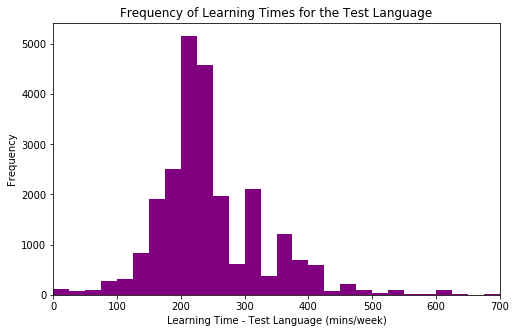

In [28]:
# Histogram of the Test Language Learning Time
binsize = 25
plt.figure(figsize=[8, 5])

bins = np.arange(0, pisa['Learning Time - Test Language'].max()+binsize, binsize)

plt.hist(data = pisa, x = 'Learning Time - Test Language', color = 'purple', bins=bins)

plt.xlim(0, 700)
plt.xlabel('Learning Time - Test Language (mins/week)')
plt.ylabel('Frequency')
plt.title('Frequency of Learning Times for the Test Language');

The same this dist. reflect the same dists. that we saw for both Mathematics and the Total Learning Time.

Since the entirety of the Learning Time variables have values that are beyond 600 minutes, and these values may mutilate our later plots, we ought to analyze them and decide whether it bodes well to dismiss them.

#### Select high outliers for the learning time total  in each subject

In [29]:
high_outliers_math = (pisa['Learning Time - Mathematics'] > 600)

print(high_outliers_math.sum())
print(pisa.loc[high_outliers_math,:])

107
                        Country  Student ID  Gender  \
206                  Kazakhstan        4894    Male   
656         Massachusetts (USA)        1658    Male   
780    United States of America        1649    Male   
792    United States of America        2195    Male   
812    United States of America        4238    Male   
1139                     Brazil       11526    Male   
1331                     Canada        8086  Female   
1587       United Arab Emirates        8673    Male   
1627                    Denmark        1626    Male   
1986                     Canada       14395  Female   
2021                     Canada       17113    Male   
2024                     Canada       14277  Female   
2066                      Chile        3285  Female   
2221       United Arab Emirates        9562  Female   
2641                     Canada       17402  Female   
2646                     Canada       21437    Male   
2713                     Brazil       16899  Female   
3343  

In [30]:
high_outliers_lang = (pisa['Learning Time - Test Language'] > 600)

print(high_outliers_lang.sum())
print(pisa.loc[high_outliers_lang,:])

105
                        Country  Student ID  Gender  \
409              United Kingdom       10803  Female   
656         Massachusetts (USA)        1658    Male   
780    United States of America        1649    Male   
792    United States of America        2195    Male   
1120                     Brazil        4153    Male   
1139                     Brazil       11526    Male   
1468       United Arab Emirates        7004  Female   
1587       United Arab Emirates        8673    Male   
1605       United Arab Emirates       10226    Male   
1627                    Denmark        1626    Male   
1986                     Canada       14395  Female   
2066                      Chile        3285  Female   
2244                    Denmark        7234  Female   
2291                     Canada        5482  Female   
2646                     Canada       21437    Male   
3304              Florida (USA)         739  Female   
3343             United Kingdom        6546    Male   
3742  

In [31]:
high_outliers_sci = (pisa['Learning Time - Science'] > 600)

print(high_outliers_lang.sum())
print(pisa.loc[high_outliers_sci,:])

105
                        Country  Student ID  Gender  \
193                  Kazakhstan        3188  Female   
206                  Kazakhstan        4894    Male   
306                  Kazakhstan        1403  Female   
309                  Kazakhstan        1110    Male   
350              United Kingdom        9960    Male   
373              United Kingdom        7553  Female   
584             Hong Kong-China        4336    Male   
656         Massachusetts (USA)        1658    Male   
735              China-Shanghai        5053    Male   
792    United States of America        2195    Male   
871                 New Zealand         258    Male   
913                 New Zealand        4147    Male   
1059                   Portugal        2447    Male   
1387                     Brazil       18569  Female   
1402                     Brazil       17671  Female   
1433       United Arab Emirates        4954  Female   
1440       United Arab Emirates        4740  Female   
1466  

Since the measure of outliers is so low and they don't carry uncommonly significant data to the investigation, it will be better in the event that we proceed without them.

In [32]:
pisa = pisa.loc[-high_outliers_math & -high_outliers_lang & -high_outliers_sci,:]

Now we can re-plot the distributions of learning times with more reliable plots

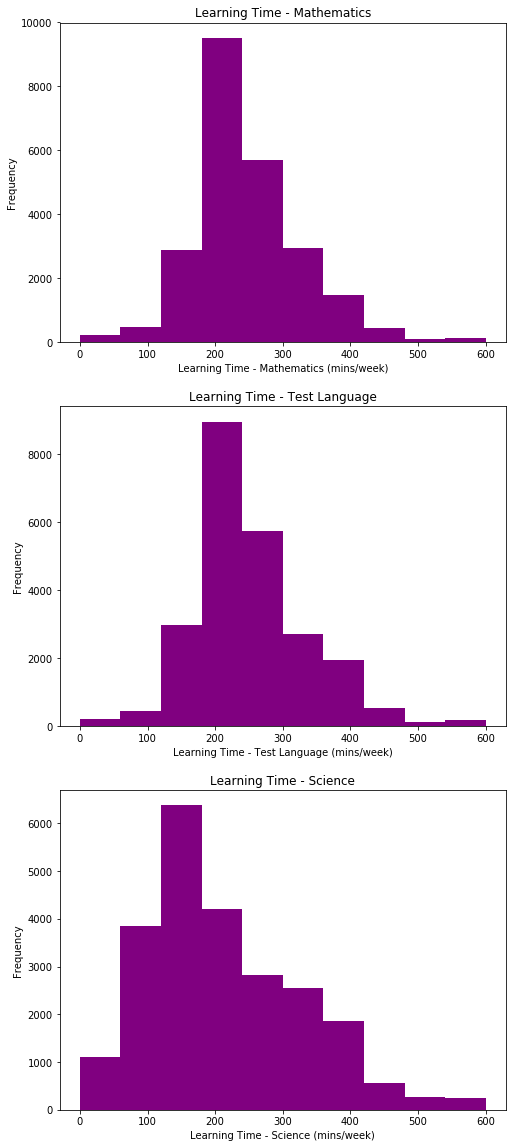

In [33]:
fig, ax = plt.subplots(nrows=3, figsize = [8,20])

variables = ['Learning Time - Mathematics', 'Learning Time - Test Language', 'Learning Time - Science']
for i in range(len(variables)):
    var = variables[i]
    ax[i].hist(data = pisa, x = var, color='purple')
    ax[i].set_xlabel('{} (mins/week)'.format(var))
    ax[i].set_ylabel('Frequency')
    ax[i].set_title('{}'.format(var))


plt.show()

To wrap things up, we actually have the parental education levels to analyze.

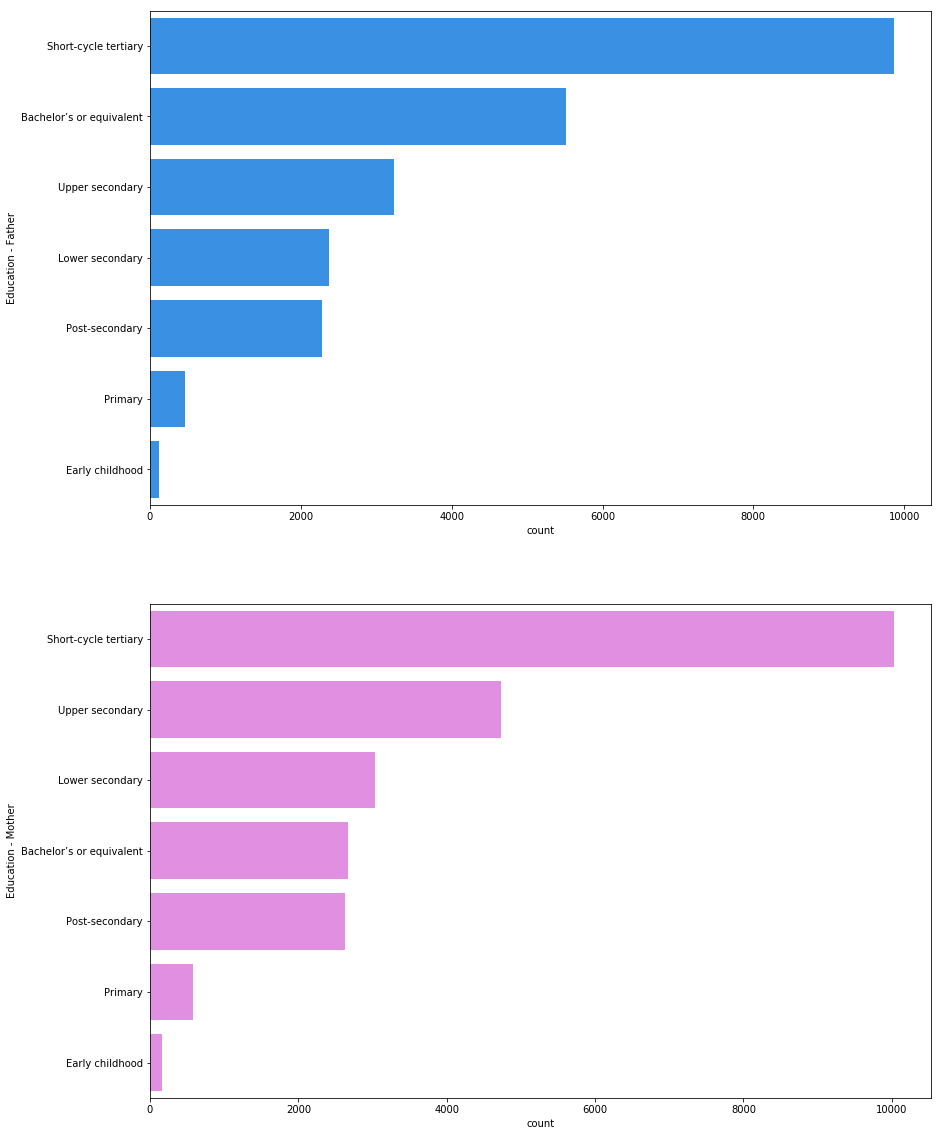

In [34]:
# The ordinal variable's distribution for both Mother's and Father's Education 
fig, ax = plt.subplots(nrows=2, figsize = [14,20])

default_color = sb.color_palette()[0]
vc_ef= pisa['Education - Father'].value_counts()
vc_em= pisa['Education - Mother'].value_counts()

sb.countplot(data = pisa, y = 'Education - Father', color = 'dodgerblue', ax = ax[0], order=vc_ef.index)
sb.countplot(data = pisa, y = 'Education - Mother', color = 'violet', ax = ax[1], order=vc_em.index)
plt.show()

Here it shows that the student that exist in this dataset normally have guardians of higher educationl levels. Short-cycle Tertiary schooling takes an unmistakable larger part for both mother and father, while parents with just Early Childhood educaution have the most minimal measure of kids in this dataset.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

For 'Average Total Score', the distribution was strikingly ordinary. Nonetheless, this was expected to an extent, since student reviews commonly fall along a bell curve. Accordingly, no abnormal focuses stood apart for this variable, nor did any stand apart for the three scores that brought about the all out score. Consequently, **no transformation** were important to sort out the data.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The secondary features investigated were Study Times, Learning Times, and Parental Schooling. 

For Study Times, the total had a strong right skew, as did the rest of the Study Times that the all out was made out of. To more readily comprehend this component, we spread the complete across a logarithmic scale to check whether it was not indeed unimodal or to perceive some other anomalies. Eventually, it wound up being unimodal and very normal. 

Concerning the Learning Time, this data plainly had outliers, so for every one of the Learning Time's, the exceptions more than 600 minutes were barred. This was done to take a gander at the more ordinary student results, thus that later plots  will not be distorted by these exceptionally dedicated students. 

Also, the Parents Education variables have altogether too much weight on parents with higher education levels, yet considering the plots we will run, this ought not have an great effect so we will leave it as is

## Bivariate Exploration :Trends and Correlation

#### Out-of-School Study Time and Learning Time

To get going, we should take a look at the correlations between each of the Scores, the Total Out-of-School Study Time, and the Total Learning Time to see if the amount of time dedicated to a subject has an impact on the score, and how strongly the Scores are correlated with one another. This will help us answer the question of whether or not there is a relationship between the amount of time a student dedicates to learning and their score. 

In [35]:
num_vars = ['Average_Math_Score', 'Average_Reading_Score', 'Average_Science_Score', 'Average_Total_Score', 'Out-of-School Study Time - Total', 'Learning Time - Total']

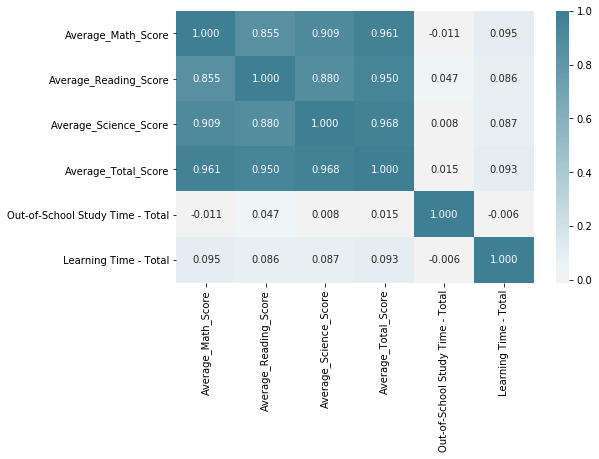

In [36]:
# Correlation plot
cmap=sb.diverging_palette(20, 220, n=200)
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = cmap, center = 0)
plt.show();

Considering the correlations between the Scores, the Total Out-of-School Study Time and Total Learning Time, we can see that the Total Learning Time is a little better correlated with the scores than the Total Out-of-School Study Time, with the Average Reading Score being the exception.

To more readily understand the relationship between the Scores and the Learning Time, lets look at the breakdown of each of the Learning Time per subject.

In [37]:
ScoreLearnVars = ['Average_Math_Score', 'Average_Reading_Score', 'Average_Science_Score', 
                    'Average_Total_Score', 'Learning Time - Mathematics',
                    'Learning Time - Test Language', 'Learning Time - Science', 
                    'Learning Time - Total']

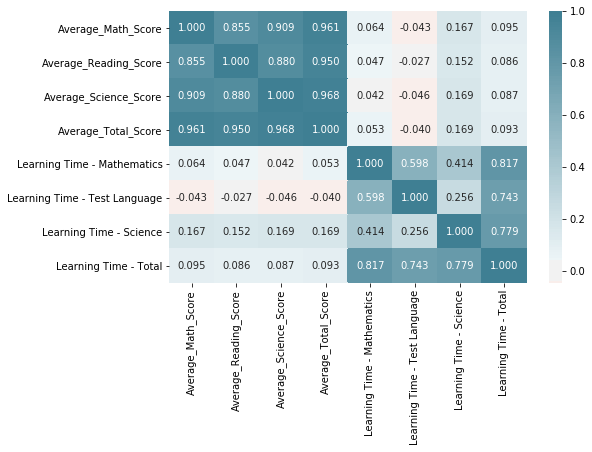

In [38]:
# correlation plot
plt.figure(figsize = [8, 5])

sb.heatmap(pisa[ScoreLearnVars].corr(), annot = True, fmt = '.3f',
           cmap = cmap, center = 0)
plt.show();

Strangely, we can see that the Learning Time for Mathematics and the Test Language have no relationship at all with any of the Scores when contrasted with the Learning Time for Science.

We can look at these vars now through another perspective: look at the scatter plot relationships between them

C:\Users\j stock\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
C:\Users\j stock\Anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\j stock\Anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


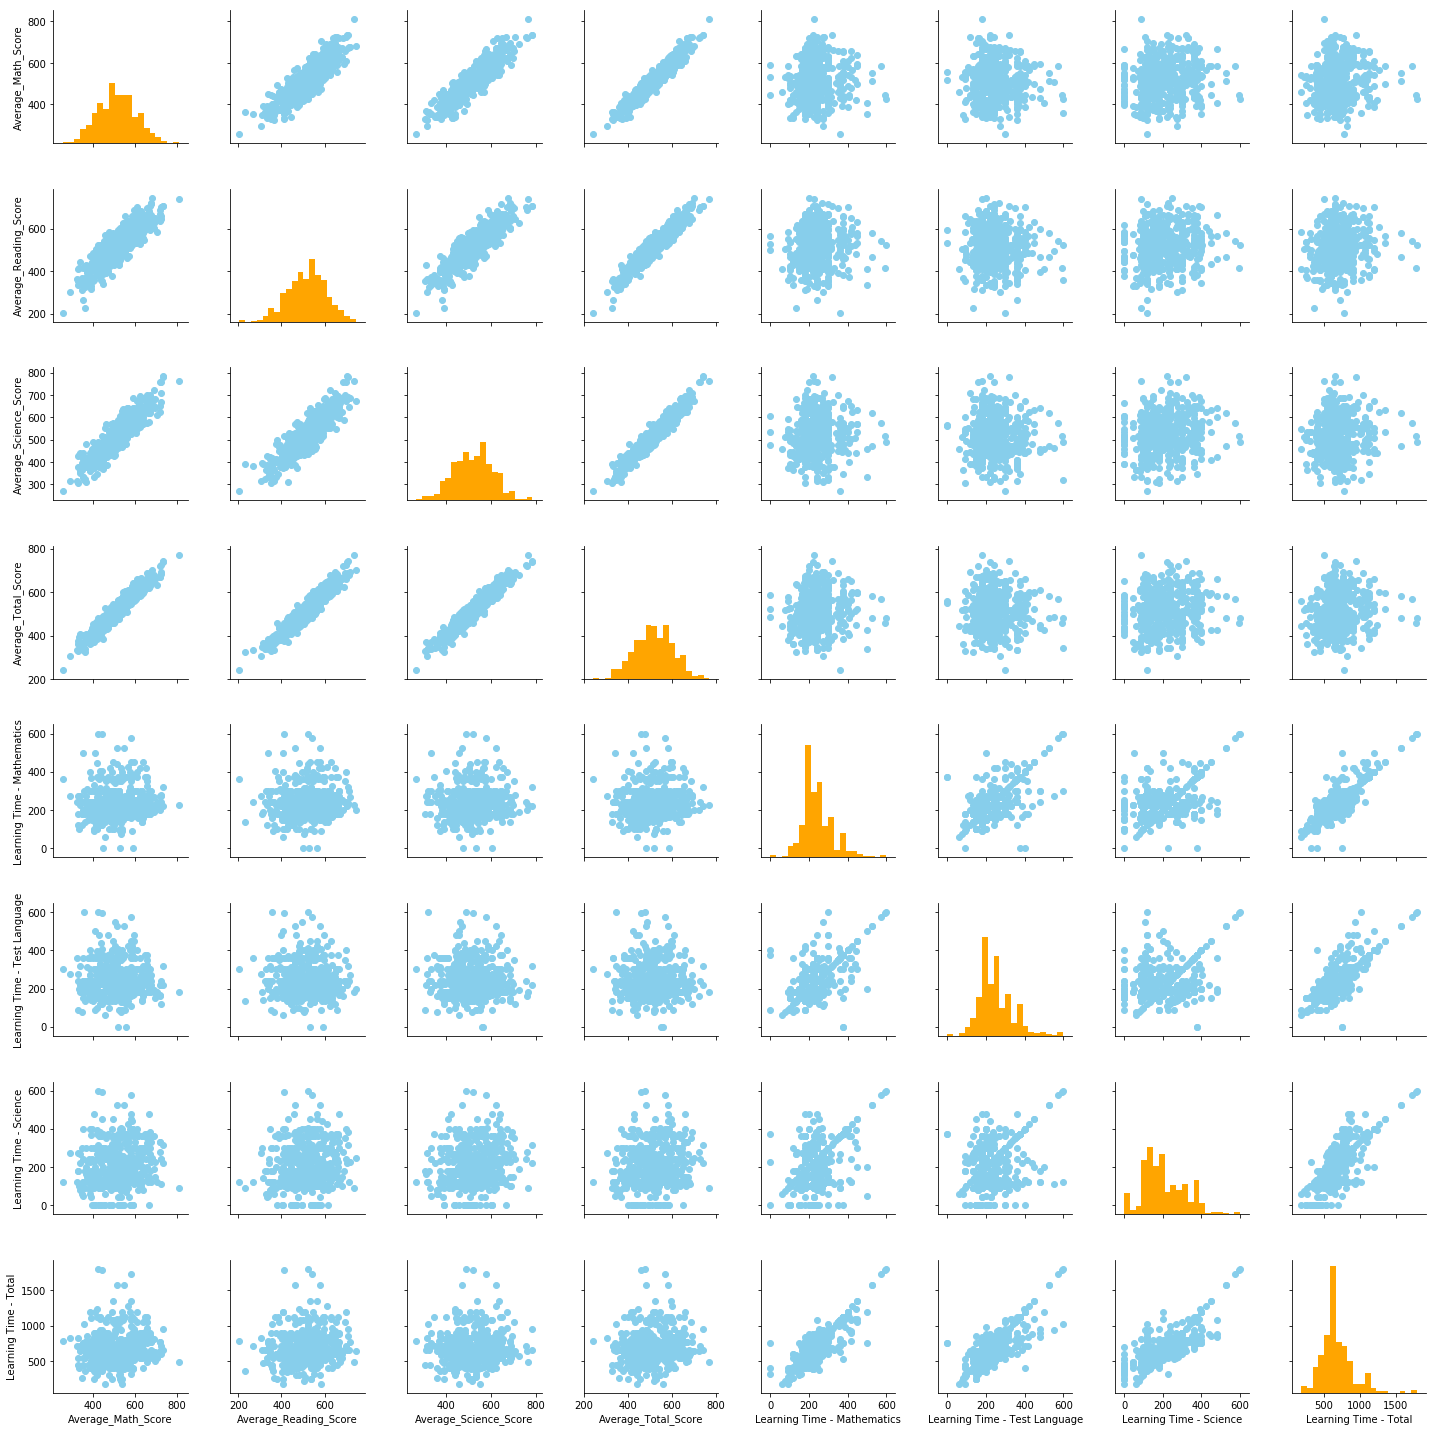

In [39]:
# Take a samples to play with it
samples = np.random.choice(pisa.shape[0], 500, replace = False)
pisa_samp = pisa.loc[samples,:]

g = sb.PairGrid(data = pisa_samp, vars = ScoreLearnVars)
g = g.map_diag(plt.hist, bins = 20, color='orange');
g.map_offdiag(plt.scatter, color = 'skyblue');

As expected, we can clearly see a strong positive relationship between each of the Scores. As for the correlations between the Learning Times, a positive relationship is visual between each of them, yet not extremely solid except for certain outliers.


With regards to the relationship between the Scores and Learning Times, we can see that the measure of time an examination spends learning a subject has no relationship with the Score that they will get as per this plot.

In [40]:
ScoreStudyVars = ['Average_Math_Score', 'Average_Reading_Score', 'Average_Science_Score', 
                    'Average_Total_Score', 'Out-of-School Study Time - Homework',
                    'Out-of-School Study Time - Guided Homework',
                    'Out-of-School Study Time - Personal Tutor',
                    'Out-of-School Study Time - Commercial Company',
                    'Out-of-School Study Time - With Parent', 
                    'Out-of-School Study Time - Total']

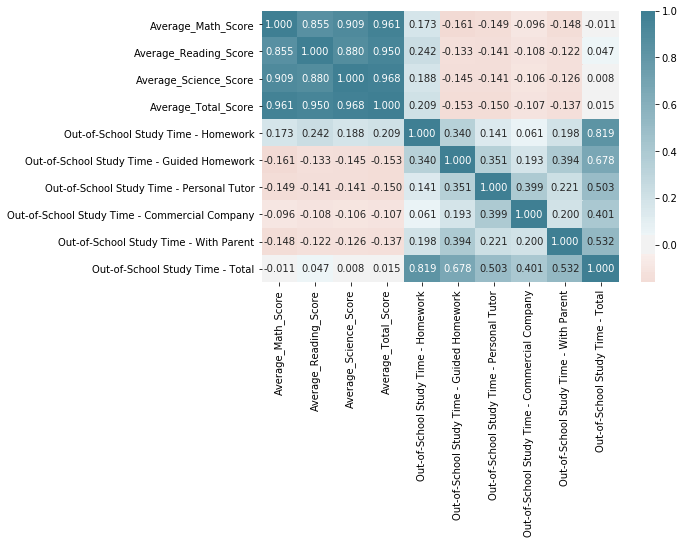

In [41]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(pisa[ScoreStudyVars].corr(), annot = True, fmt = '.3f',
           cmap = cmap, center = 0)
plt.show();

The consequences of this relationship plot are recognizable in that it denotes that  study time as far as Guided Homework, with Personal Tutor, with a Commercial Company, and with a Parent have no certain effect on the score of an student. This could be identified with the way that the students who do require this measure of help are now the ones who battle with grades, however since we have no data on past Scores of said students, we can't investigate this hypothesis any further for the now. 

We can notwithstanding, look further into the part of Homework in the students Scores 

In [42]:
ScoreStudyVars = ['Average_Math_Score', 'Average_Reading_Score', 'Average_Science_Score', 
                'Average_Total_Score', 'Out-of-School Study Time - Homework']

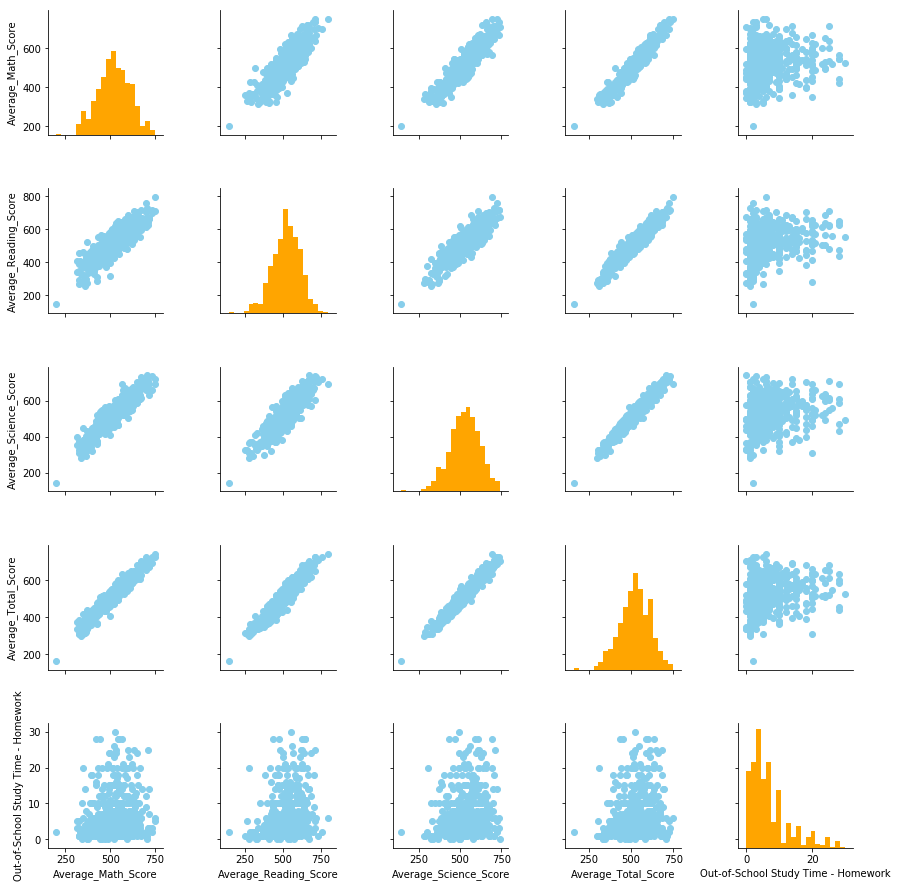

In [43]:
# Take a samples to play with it
samples = np.random.choice(pisa.shape[0], 500, replace = False)
pisa_samp = pisa.loc[samples,:] 

g = sb.PairGrid(data = pisa_samp, vars = ScoreStudyVars)
g = g.map_diag(plt.hist, bins = 20, color='orange');
g.map_offdiag(plt.scatter, color = 'skyblue');

Albeit the correlation between Homework Study Time and every one of the different Scores is frail, we can see that the additional time an student spends on Homework, the higher their Score is. However, this relationship just truly exists until the Score is around 450. So for the students who are at the lower part of the Scoring rank invest energy doing Homework, at that point they can move into the normal Scores. Concerning the higher Scores, appears as though they are by and large unaffected. 

Finally, we should take a look at the connection between the Study Time and Learning Time Vars to check whether they emphatically with each other in any intriguing manner.

In [44]:
timeVars = ['Out-of-School Study Time - Homework',
            'Out-of-School Study Time - Guided Homework',
            'Out-of-School Study Time - Personal Tutor',
            'Out-of-School Study Time - Commercial Company',
            'Out-of-School Study Time - With Parent',
            'Learning Time - Mathematics',
            'Learning Time - Test Language',
            'Learning Time - Science']

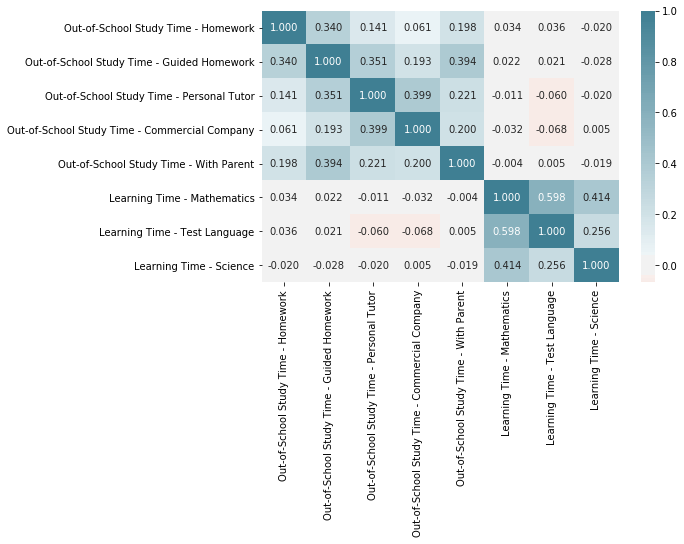

In [45]:
# correlation plot
plt.figure(figsize = [8, 5])

sb.heatmap(pisa[timeVars].corr(), annot = True, fmt = '.3f',
           cmap = cmap, center = 0)
plt.show();

With regards to the Study Times and Learning Times, no relationship is noticeable, and they scarcely have any associations with the actual classes. Along these lines, we can't say that specific students concentrate inside school and outside of school more than others. Overall for this segment, we can't see a lot of an impact from Time spent learning on Scores. 

Presently we can see our next set of vars that may impact the Score of an student:

### Parental Education & Gender
To get going, how about we take a look at the circulation of each level of education and the recurrence of each.

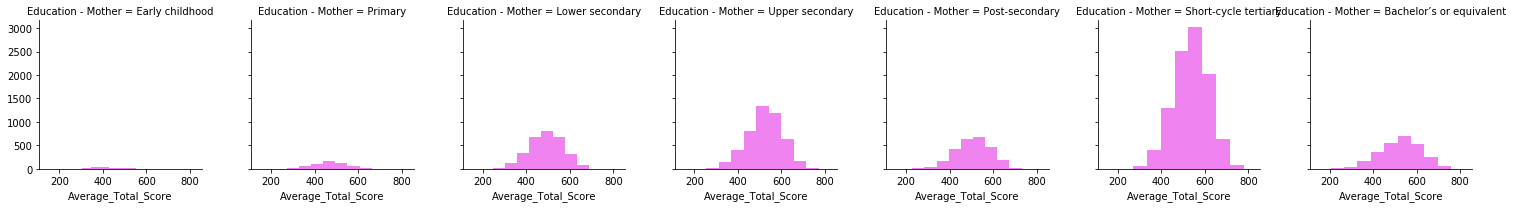

In [46]:
g = sb.FacetGrid(data = pisa, col = 'Education - Mother');
g.map(plt.hist, 'Average_Total_Score', color = 'violet');

Here we can see that the youngsters in this dataset regularly have moms with a Short-cycle Tertiary Educ. As far as Scores for each level, kids with moms who have just Early Childhood education perform a lot of more terrible, with distribution that doesn't arrive at the Score of 600. In the interim, the most elevated level of Bachelor's or equivalent is slightly left skewed and goes past the 600 mark.

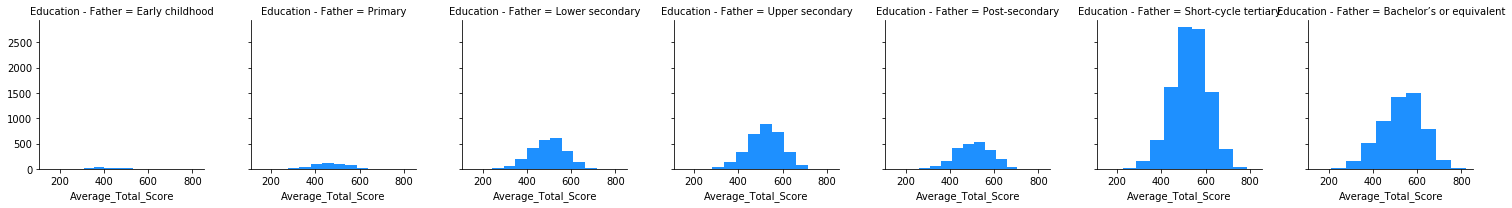

In [47]:
g = sb.FacetGrid(data = pisa, col = 'Education - Father');
g.map(plt.hist, 'Average_Total_Score', color = 'dodgerblue');

The equivalent can be said for the training levels for the fathers. Besides here we have more fathers with Bachelor's or equivalent educations.

Next we can take a look at the distribution for every one of these levels to see the reach and medians better.

C:\Users\j stock\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


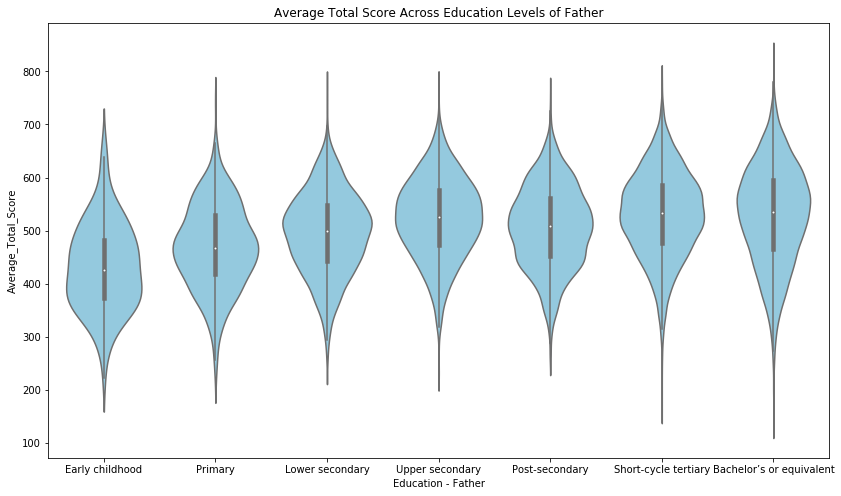

In [48]:
plt.figure(figsize=[14,8])
sb.violinplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average_Total_Score',
              color = 'skyblue')
plt.title('Average Total Score Across Education Levels of Father');

Curiously, the spread is very huge for the offspring of higher educated fathers. Truth be told, apparently the kid who performed most noticeably awful had a dad with Short-cycle Tertiary eductation. Then, the kids with parents who have just Youth schooling appear to have a lot more modest reach and exist to a much greater extent around the middle.

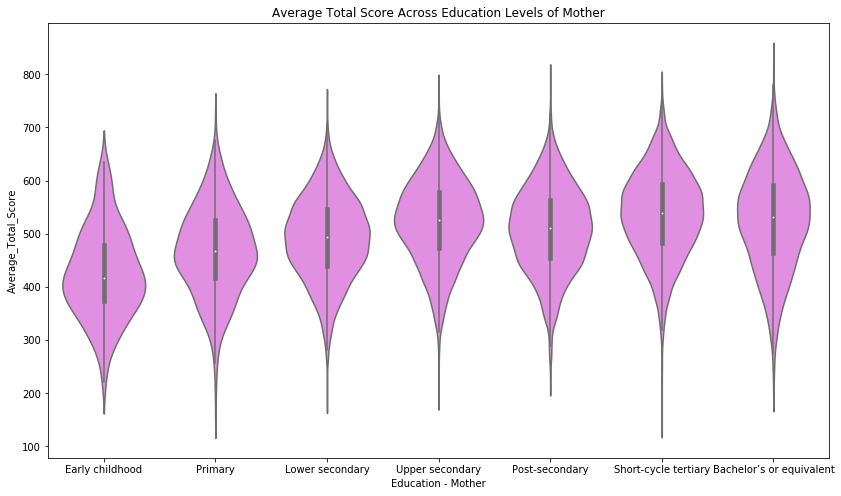

In [49]:
plt.figure(figsize=[14,8])
sb.violinplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average_Total_Score', 
              color = 'violet')
plt.title('Average Total Score Across Education Levels of Mother');

The violin plot for the Mother's education is more as per what we expect, with the middle developing starting with one level then onto the next, and every one of which has a sensible spread. 

Yet, to see the extent to which the outliers assume a part, we can take a look at similar data with box plots.

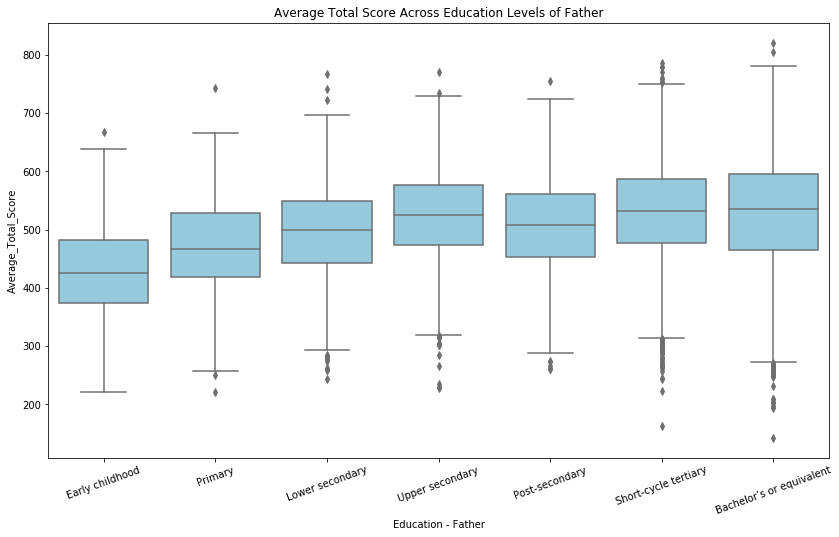

In [50]:
plt.figure(figsize=[14,8])
sb.boxplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average_Total_Score',
              color = 'skyblue');
plt.xticks(rotation = 20)
plt.title('Average Total Score Across Education Levels of Father');

Once again we can see the student who performs most minimal by and large is an outlier for the Short-cycle Tertiary level, and overall a similar trend exists.

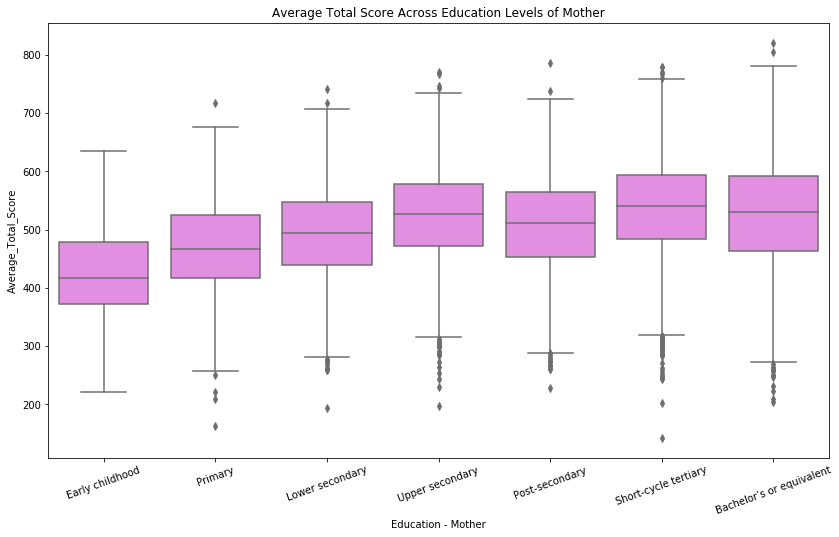

In [51]:
plt.figure(figsize=[14,8])
sb.boxplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average_Total_Score',
              color = 'violet')
plt.xticks(rotation = 20)
plt.title('Average Total Score Across Education Levels of Mother');

Here we can see that for the lower education levels for the mother, the students are by and large accomplishing lower grades, yet there are a decent measure of high score outliers. While on the other portion of the education levels, there is a propensity for high grades with a couple of low score outliers.

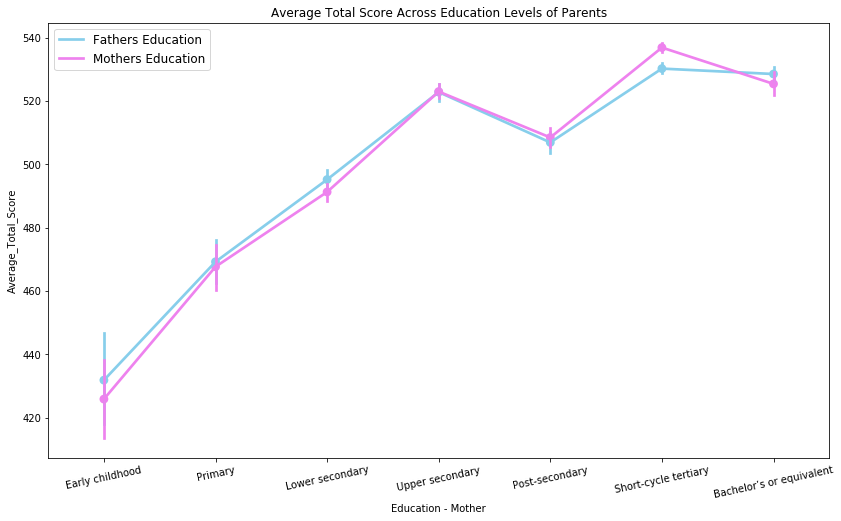

In [52]:
# Score averages of students Vs. education levels of Father
plt.figure(figsize=[14,8])
sb.pointplot(data = pisa, 
            x = 'Education - Father', 
            y = 'Average_Total_Score',
            color = 'skyblue')

# Score averages of students Vs. education levels of Mother
sb.pointplot(data = pisa, 
            x = 'Education - Mother', 
            y = 'Average_Total_Score',
            color = 'violet')

plt.title('Average Total Score Across Education Levels of Parents')

# Set legend
plt.legend(labels=['Fathers Education', 'Mothers Education'], loc='upper left', fontsize='large')
#https://stackoverflow.com/questions/44880444/how-to-increase-the-font-size-of-the-legend-in-my-seaborn-plot
ax = plt.gca()
plt.xticks(rotation = 12)
leg = ax.get_legend()
leg.legendHandles[0].set_color('skyblue')
leg.legendHandles[1].set_color('violet');

When all is said in done, we can see that the student Scores develop with the education level of the parent, regardless of the gender of the parent, until a point where it appears to level. 

Presently we can move towards viewing at the gender of the child also.

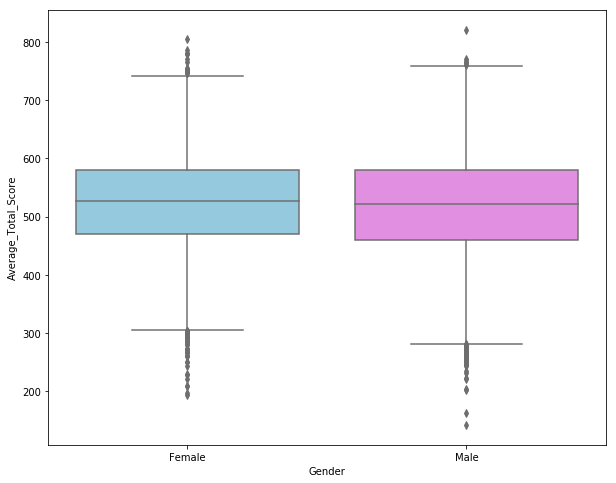

In [53]:
plt.figure(figsize=[10,8])

sb.boxplot(data = pisa, 
           x = 'Gender', 
           y = 'Average_Total_Score',
           palette = ['skyblue', 'violet']);

If we look at the job that Gender plays on the Score, the reach appears to coordinate. Be that as it may, the males appear to plunge lower with their outliers.

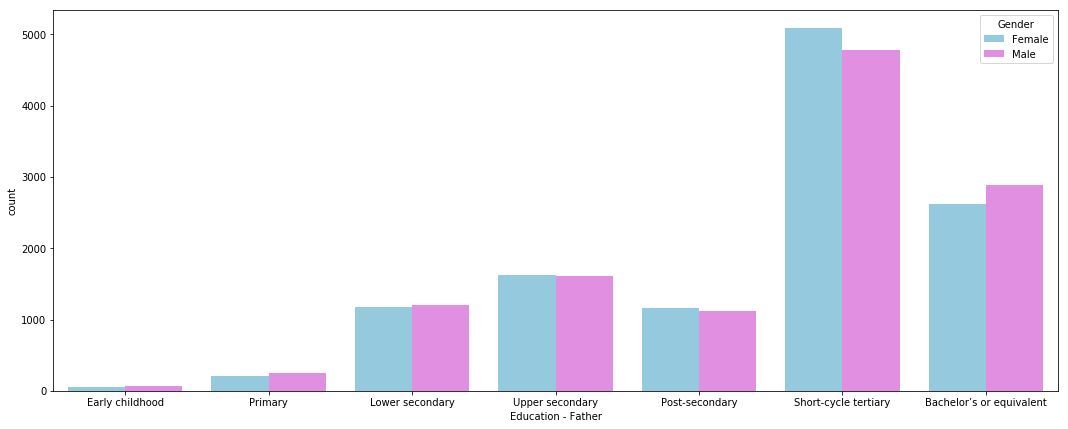

In [54]:
plt.figure(figsize=[18,7])

sb.countplot(data = pisa, x = 'Education - Father', hue = 'Gender', palette = ['skyblue', 'violet']);

Here we can perceive the number of female and male children have parents that fall into the educational levels. It's for the most part about the equivalent, except for Bachelor's or equivalent, where there are a lot a bigger number of males than females. 

Presently we can take a gander at whether gender assumes a part in the Score of an student

In [55]:
# Create a subset to better see comparison plots
np.random.seed(2018)
sample = np.random.choice(pisa.shape[0], 200, replace=False)
pisa_subset = pisa.loc[sample]

C:\Users\j stock\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  after removing the cwd from sys.path.


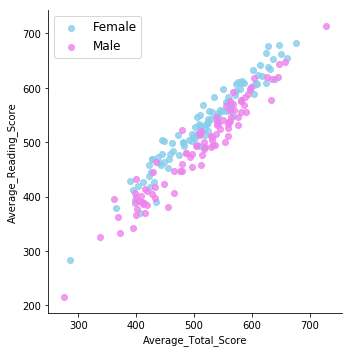

In [56]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender', palette = ['skyblue', 'violet'], height=5)
g.map(sb.regplot, 'Average_Total_Score', 'Average_Reading_Score', fit_reg = False)
plt.legend(fontsize= 'large');

Here we can see that females have a propensity for higher Reading Scores, and males have an inclination for higher Number Math Scores.

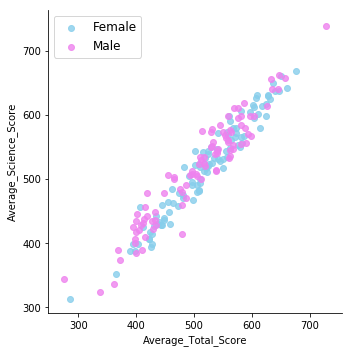

In [57]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender', palette = ['skyblue', 'violet'], height=5)
g.map(sb.regplot, 'Average_Total_Score', 'Average_Science_Score', fit_reg = False)
plt.legend(fontsize= 'large');

A similar partition can't be made when contrasting Math with Science for male and female. They appear to cover totally.

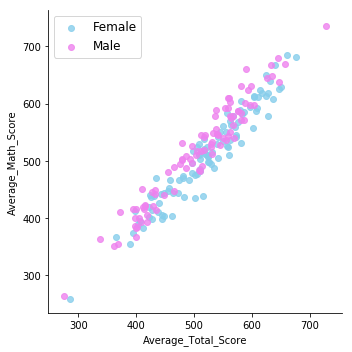

In [58]:
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender', palette = ['skyblue', 'violet'], height=5)
g.map(sb.regplot, 'Average_Total_Score', 'Average_Math_Score', fit_reg = False)
plt.legend(fontsize= 'large');

Once again, females beat a piece with regards to males and the Reading Score.

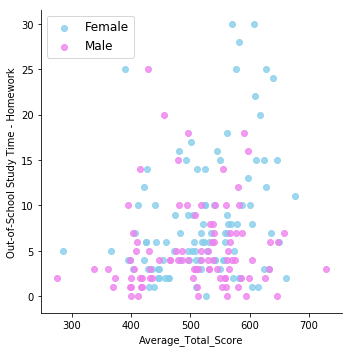

In [59]:
# Try with Study Time - Homework
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender', palette = ['skyblue', 'violet'], height=5)
g.map(sb.regplot, 'Average_Total_Score', 'Out-of-School Study Time - Homework', fit_reg = False)
plt.legend(loc = 'upper left', fontsize= 'large');

With regards to the one Out-of-School Study Time variable that had any significant connection from previously, the Homework variable here has an irrelevant relationship to Score, as well as Gender

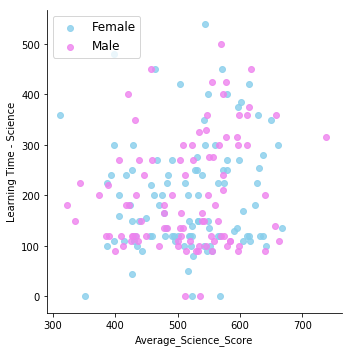

In [60]:
# Try with Learning Time - Science
g = sb.FacetGrid(data = pisa_subset, hue = 'Gender', palette = ['skyblue', 'violet'], height=5)
g.map(sb.regplot, 'Average_Science_Score', 'Learning Time - Science', fit_reg = False)
plt.legend(loc = 'upper left', fontsize= 'large');

Likewise with the Out-of-School Study Time variable, we can take a gander at the Science Score versus the Science Score here since it was the most grounded relationship. Indeed, the impact of Gender isn't noticeable.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In this segment it became obvious that the Scores were less affected by Out-of-School Study Time and Learning Time than anticipated. For Learning Time in school, we saw that Science had a more certain relationship with every one of the Scores than the Math and Reading Learning Times

The scores were anyway firmly related to the Educational level of the parents. We saw that the higher the level of education of either the mother or father, the higher the score of the student is bound to be, on normal at any rate. Likewise, we saw that the female students somewhat beat the male students on the Average Reading Score, however for the most part the females and males played out the equivalent all through.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Curiously, Out-of-School Study Time and Learning Time were not as huge as I had anticipated. Specifically, we can see that the only significant and positively correlated Out-of-School Study Time variable was Homework, and the rest were correlated in a powerless negative manner to the student's score.

## Multivariate Exploration

To get going this segment of investigation, we should proceed with the box plots and gender examinations from previously..

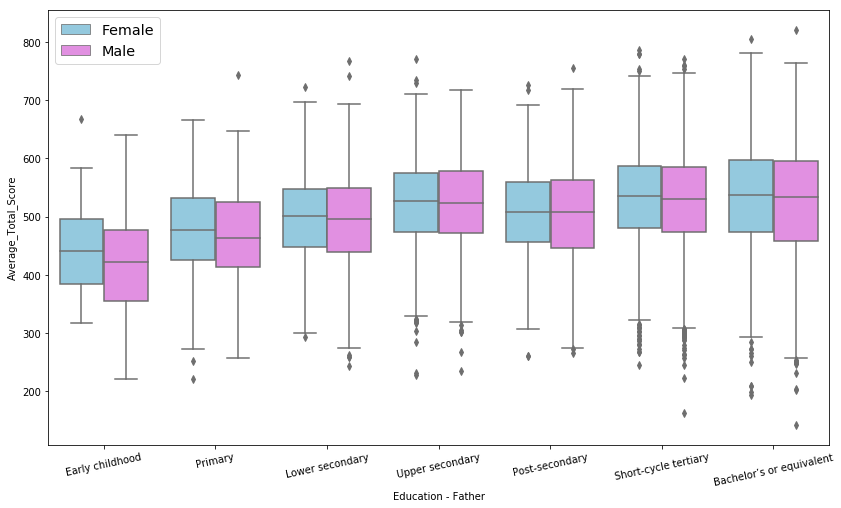

In [61]:
plt.figure(figsize=[14,8])
sb.boxplot(data = pisa, 
            x = 'Education - Father', 
            y = 'Average_Total_Score',
            hue = 'Gender',
            palette = ['skyblue', 'violet']);
plt.xticks(rotation = 12)
plt.legend(loc = 'upper left', fontsize= 'x-large');

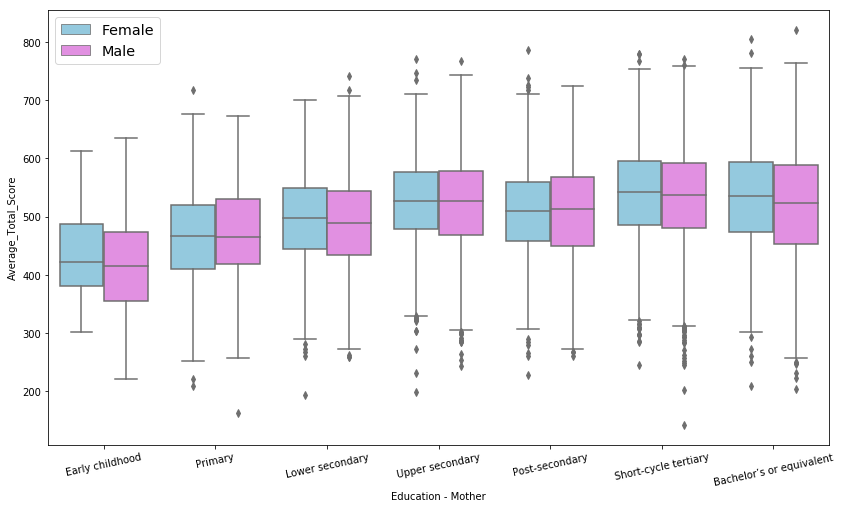

In [62]:
plt.figure(figsize=[14,8])
sb.boxplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average_Total_Score',
              hue = 'Gender',
              palette = ['skyblue', 'violet']);
plt.xticks(rotation = 12)
plt.legend(loc = 'upper left', fontsize= 'x-large');

Here we answer one of the first inquiries of whether there contrasts in accomplishment dependent on gender or parental education levels. For both Father and Mother, we can see an irrelevant contrast among males and females for all levels. The amplest hole between the two genders exists for the Essential education level for both Father and Mother, yet the extent of students in this class is little, and the medians are all things considered comparative enough.

Also, with regards to the educational levels of the parents, well those certainly assume a part in how effective an student will in general be. There is obviously an emotional spread in the two ways and outliers, however it appears to bwe can notice the connection between Learning Times and their particular subjects.e that the middle Score for students is firmly identified with the instructive level of one or the other Mother or Father.

Now we can notice the connection between Learning Times and their particular subjects.

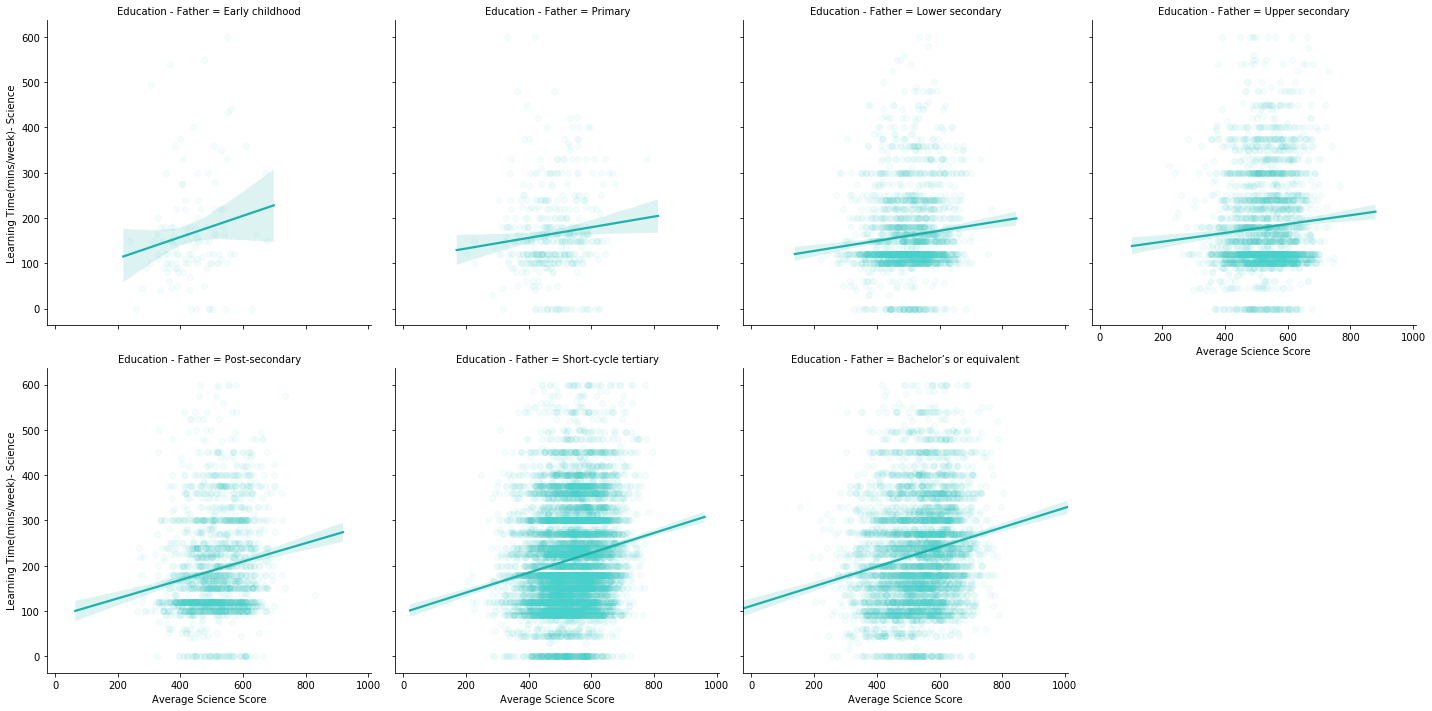

In [63]:
# Faceted scatter plots on levels of Father's education 'Sciecne'
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Science_Score', 'Learning Time - Science', 
      color = 'mediumturquoise',  x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'lightseagreen'})
g.set_xlabels('Average Science Score')
g.set_ylabels('Learning Time(mins/week)- Science')

plt.show();

Beforehand, we saw that the measure of Learning Time for Science looked encouraging when it went to its connection to its relating Score, the Normal Science Score, at any rate in contrast with different sets. In any case, when we take a gander at the relapse plots we see here, we can see there may be a partition between the students. The line of regression appears to be showing a negative correlation between Learning Time for Science and the Average Science Score for the students whose Fathers achieved Primary,Lower secondary, and Upper secondary education. Then again, with the 3 most elevated levels of education in our dataframe, Post-secondary, Short-cycle tertiary, and Bachelor's or same, we can see a positive connection. This may demonstrate that the higher the education of the father, the almost certain that Science related Learning Time in school will create a higher evaluation.

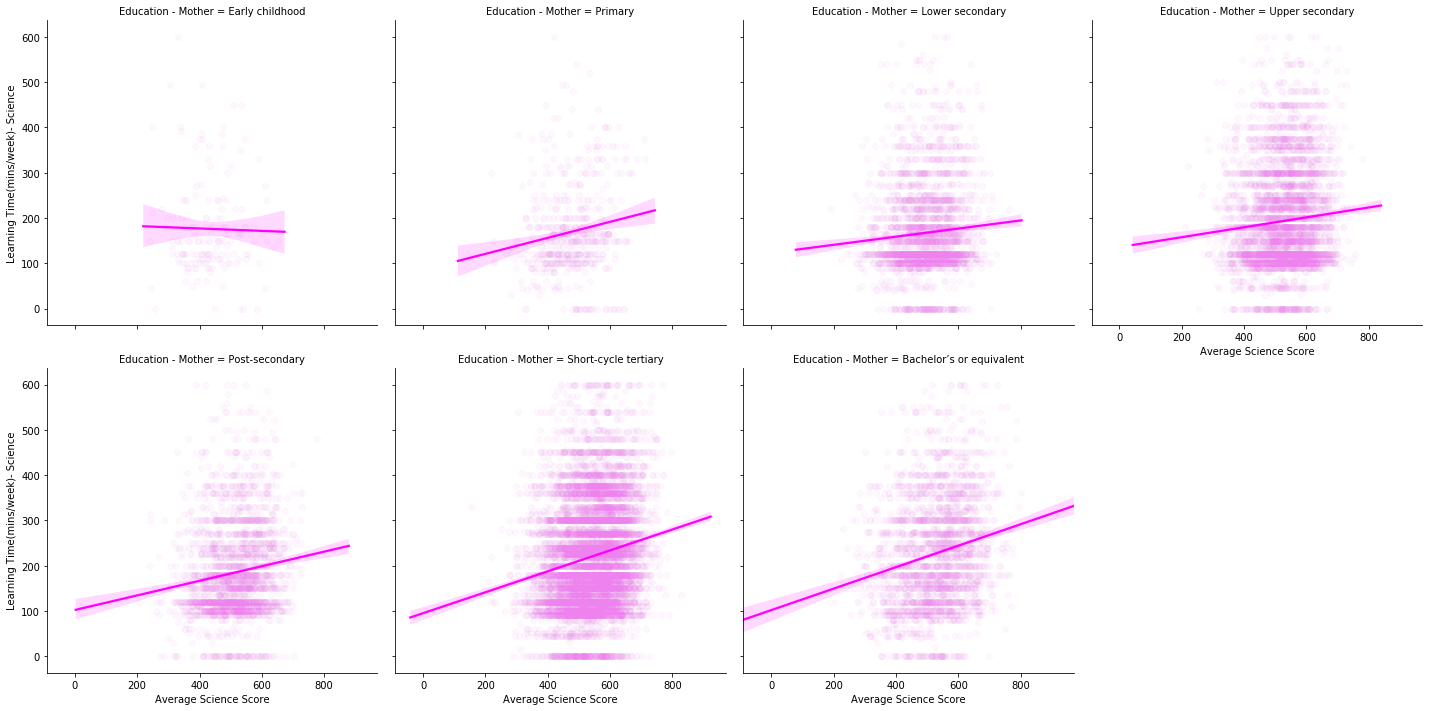

In [64]:
# Faceted scatter plots on levels of Mother's education 'Science'
g = sb.FacetGrid(data = pisa, col = 'Education - Mother', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Science_Score', 'Learning Time - Science', color = 'violet',  x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'fuchsia'})
g.set_xlabels('Average Science Score')
g.set_ylabels('Learning Time(mins/week)- Science')

plt.show();

To set add backing to the contention that the more Science related Learning Time in school there is, the better the Science Score of the student will be if the parental education is Post-secondary or higher, we can see that the outcomes for the Mother's education match. 

Considering this, it would be intriguing on the off chance that we saw comparable outcomes for the Science and Reading related scores.

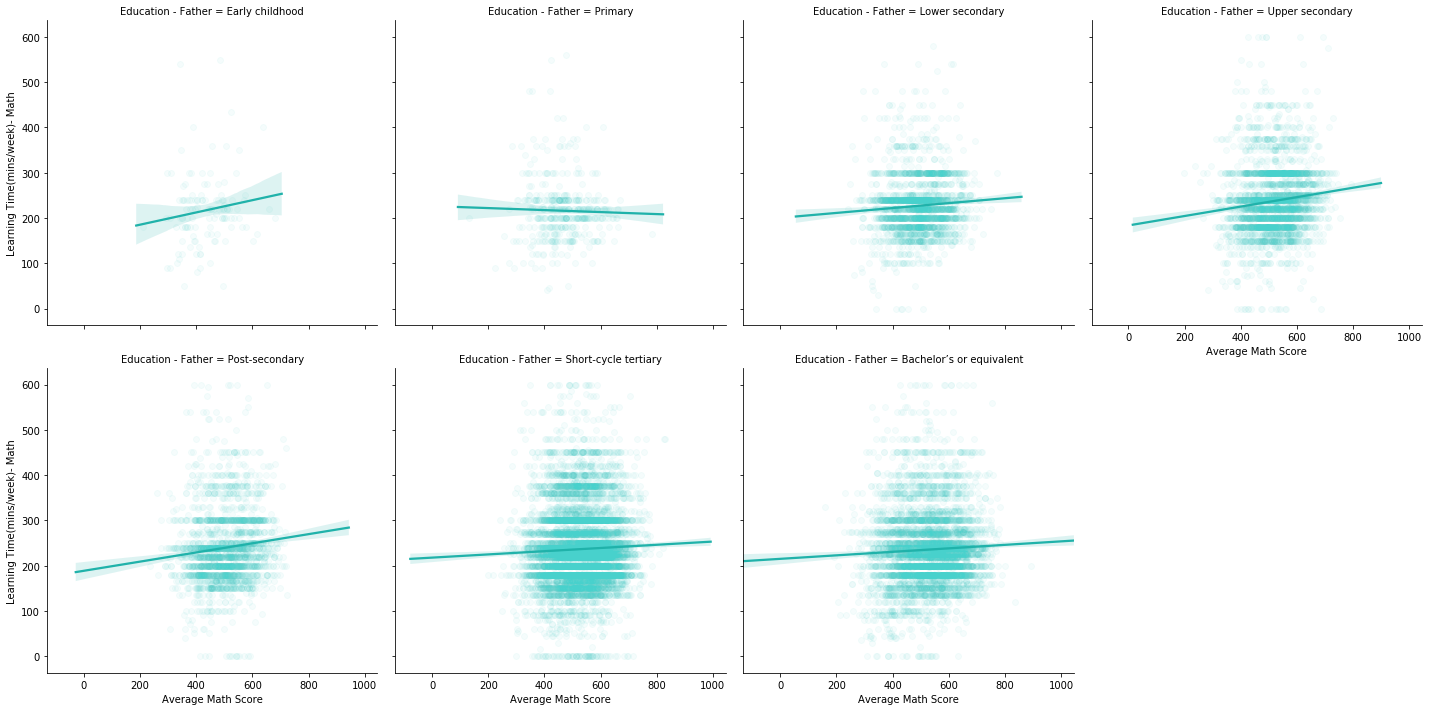

In [65]:
# Faceted heat maps on levels of Father's education 'Math'
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Math_Score', 'Learning Time - Mathematics', color = 'mediumturquoise', x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'lightseagreen'})
g.set_xlabels('Average Math Score')
g.set_ylabels('Learning Time(mins/week)- Math')

plt.show();

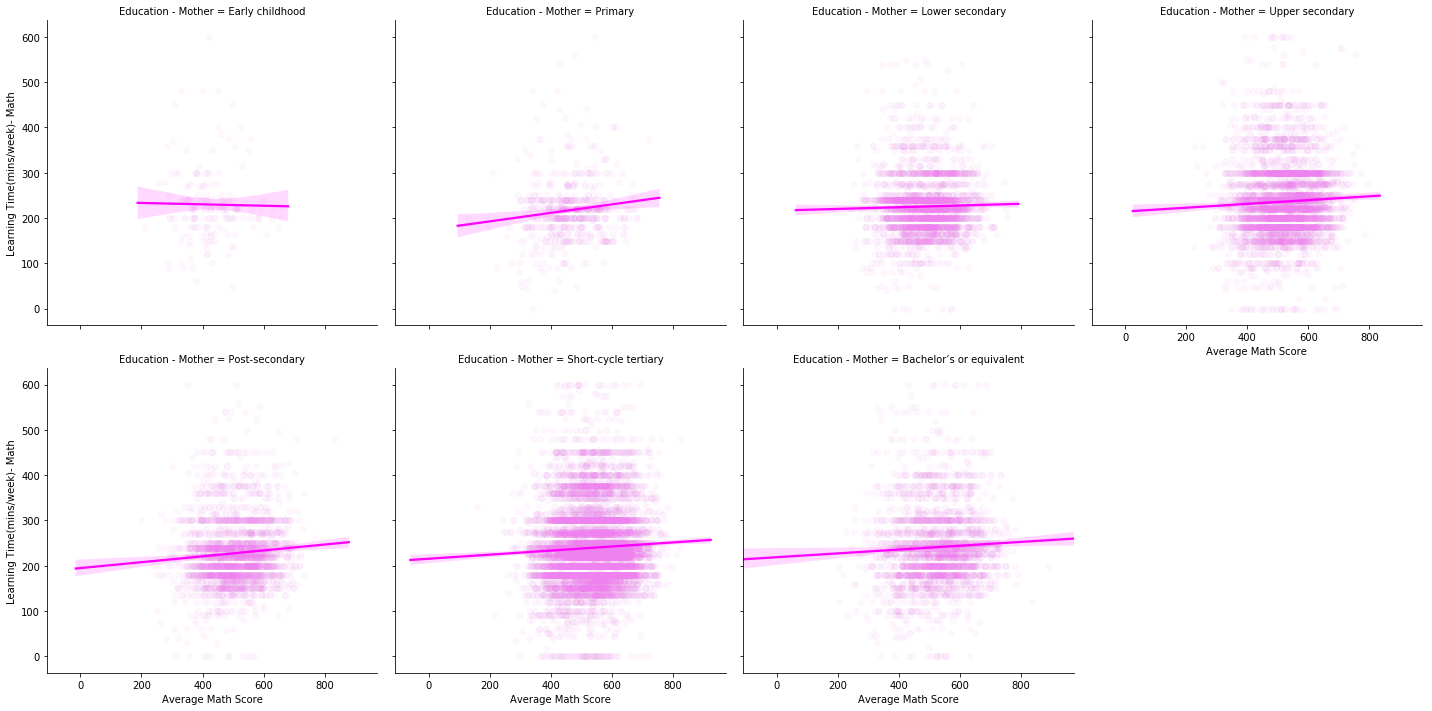

In [66]:
# Faceted scatter plot on levels of Mothers's education 'Math'
g = sb.FacetGrid(data = pisa, col = 'Education - Mother', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Math_Score', 'Learning Time - Mathematics', color = 'violet', x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'fuchsia'})
g.set_xlabels('Average Math Score')
g.set_ylabels('Learning Time(mins/week)- Math')

plt.show();

Thinking about the outcomes for both Mother and Father, the outcomes are awfully unspectacular. We can't close a similar connection as we could for the Science Learning Time and Score relationship. Here, the measure of Learning Time for Science doesn't appear to assume a part in the Mathematical Score for a kid.

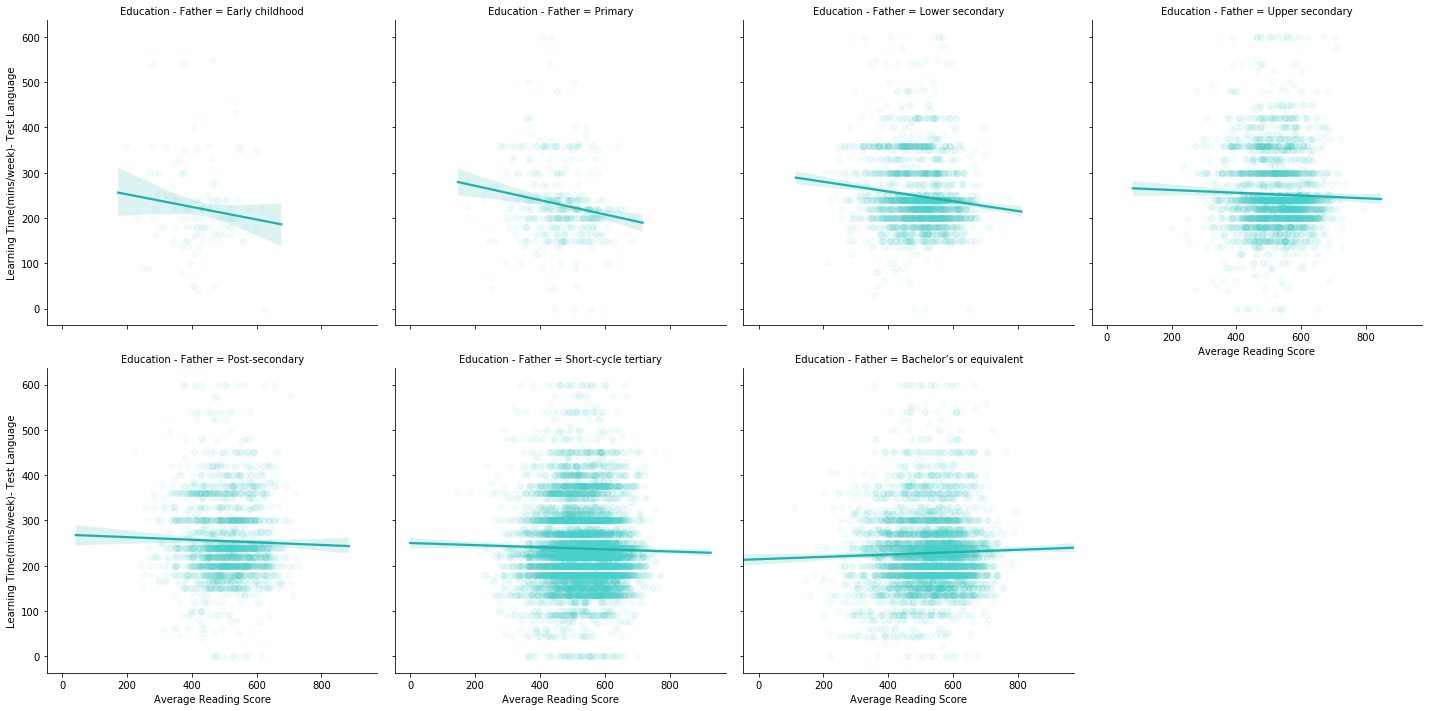

In [67]:
# Faceted scatter plot on levels of Father's education 'Reading, Test Language'
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Reading_Score', 'Learning Time - Test Language', color = 'mediumturquoise', x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'lightseagreen'})
g.set_xlabels('Average Reading Score')
g.set_ylabels('Learning Time(mins/week)- Test Language')

plt.show();

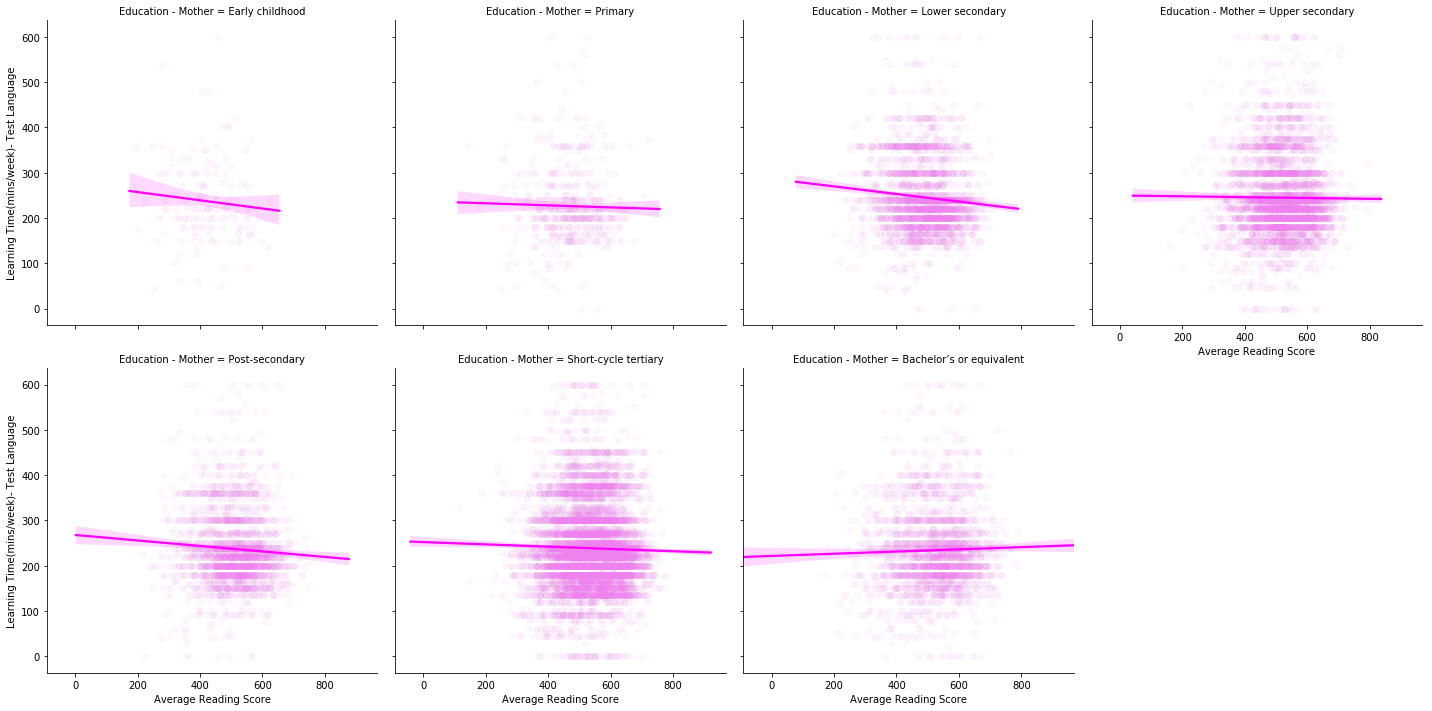

In [68]:
# Faceted scatter plot on levels of Mother's education 'Reading, Test Language'
g = sb.FacetGrid(data = pisa, col = 'Education - Mother', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Reading_Score', 'Learning Time - Test Language', color = 'violet', x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'fuchsia'})
g.set_xlabels('Average Reading Score')
g.set_ylabels('Learning Time(mins/week)- Test Language')

plt.show();

Similarly as we saw for the Math Learning Time and Score, we can see the equivalent for Reading Score and Learning Time of the Test Language. There are no unmistakable patterns and we can't presume that the Learning Time assumes a part in the accomplishment in the Reading Score. 

So for the Learning Times, we can reason that Science related Learning Time had the greatest impact on its comparing Score, and the other two are unimportant. 

Presently we can move onto Out-of-School Study Time. Already, there was not many promising outcomes out of the investigation, so how about we check whether dissecting the parental education levels may change the outcomes.

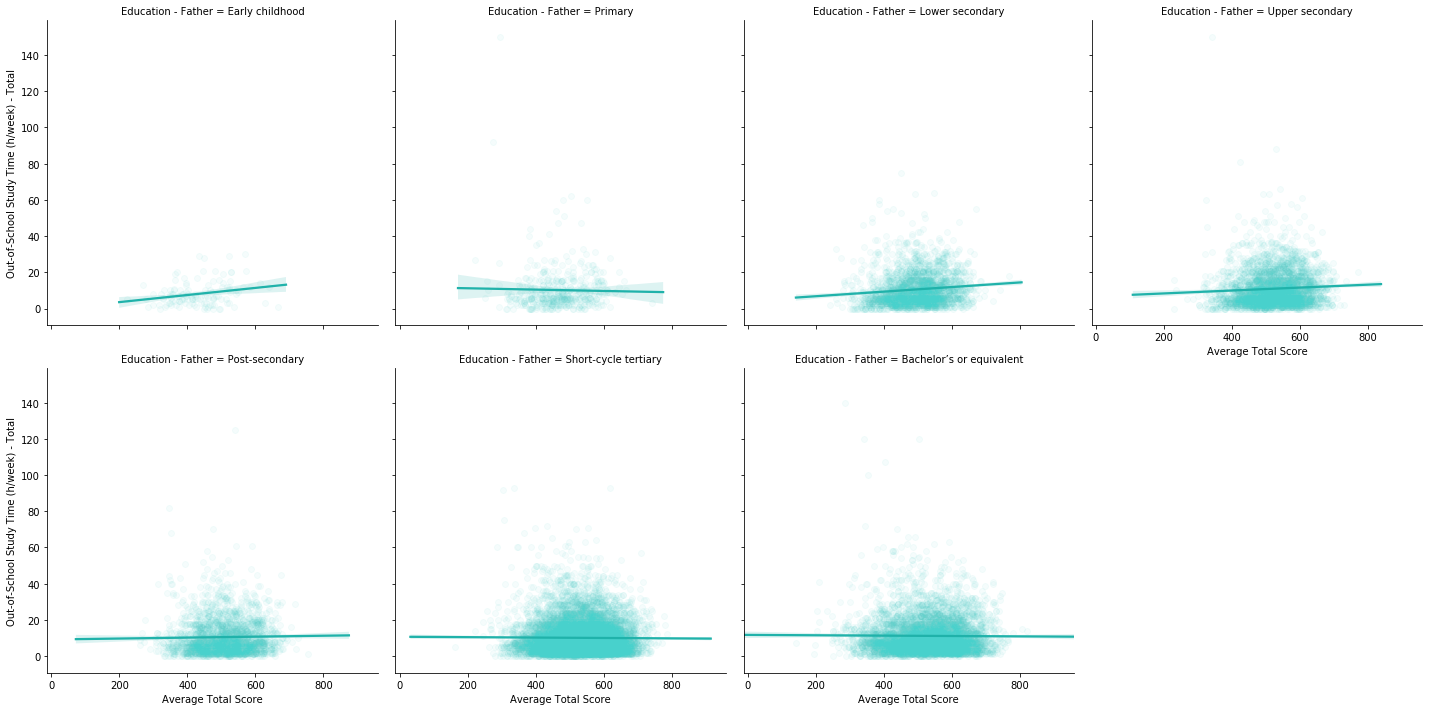

In [69]:
# Faceted scatter plot on levels of father's education with 'Study Time - Total'
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Total_Score', 'Out-of-School Study Time - Total', 
      color = 'mediumturquoise', 
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'lightseagreen'})
g.set_xlabels('Average Total Score')
g.set_ylabels('Out-of-School Study Time (h/week) - Total')

plt.show();

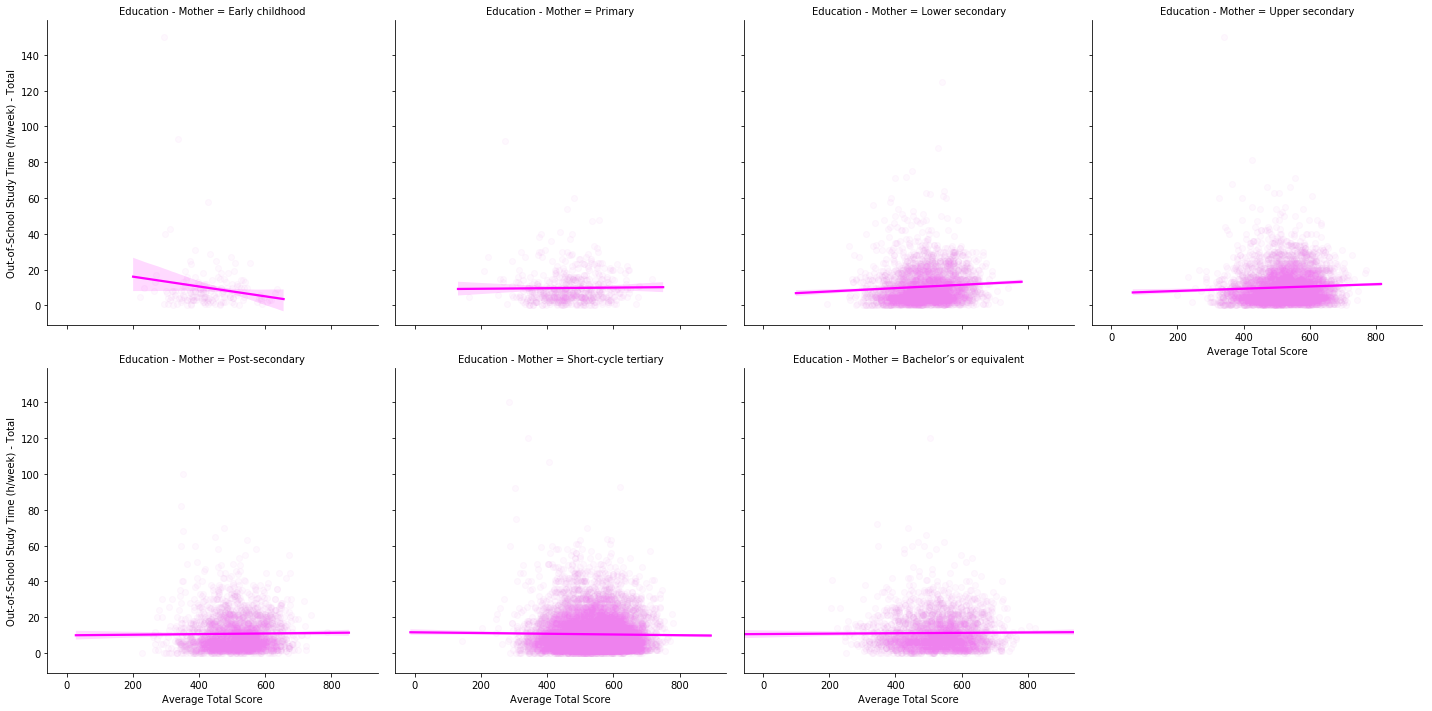

In [70]:
# Faceted scatter plot on levels of father's education with 'Study Time - Total'
g = sb.FacetGrid(data = pisa, col = 'Education - Mother', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Total_Score', 'Out-of-School Study Time - Total', 
      color = 'violet', 
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'fuchsia'})
g.set_xlabels('Average Total Score')
g.set_ylabels('Out-of-School Study Time (h/week) - Total')

plt.show();

Here we can see the All Out-of-School Study Time versus the Average Total Score. It's exceptionally evident that there is no important connection between these two. We can investigate every one of the factors that made up the Total Out-of-School Study Time to check whether there are any perceptible connections.

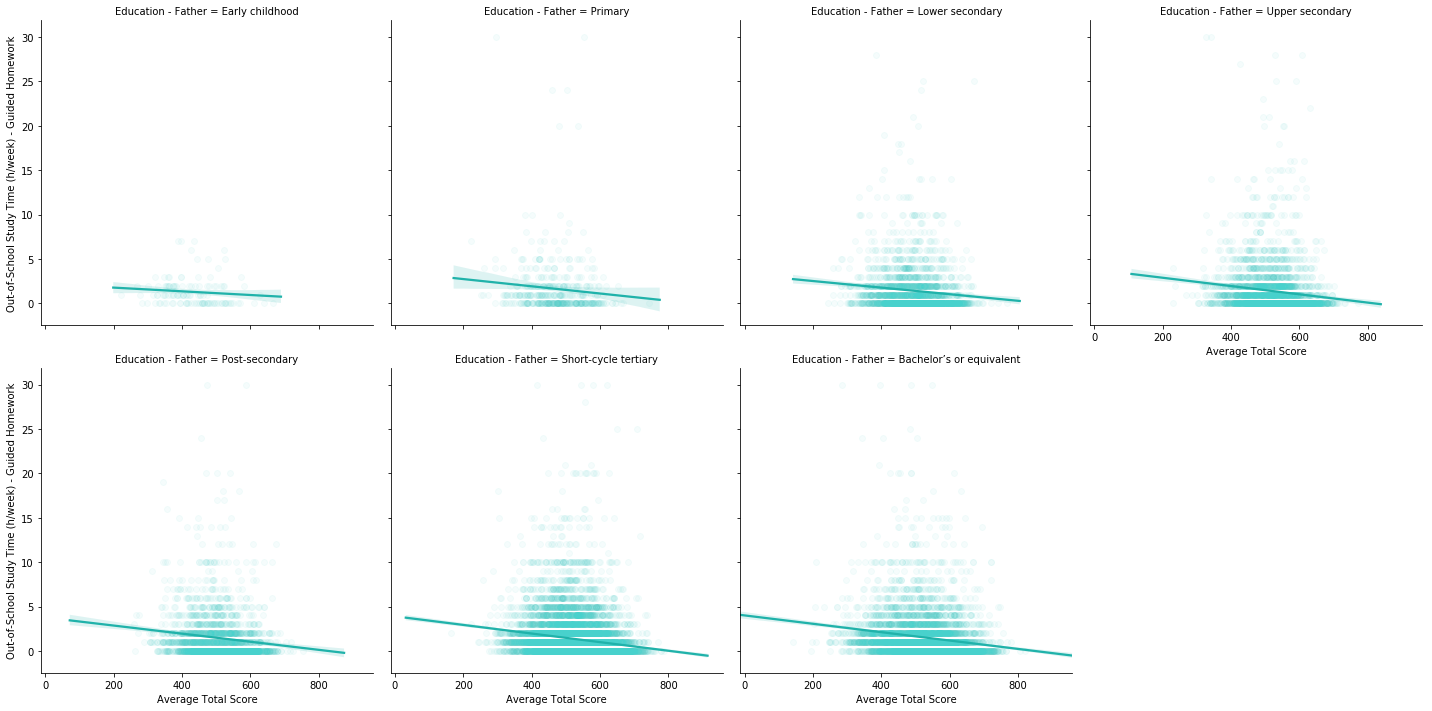

In [71]:
# Faceted scatter plot on levels of father's education 'Study Time - Guided Homework'
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Total_Score', 'Out-of-School Study Time - Guided Homework', 
      color = 'mediumturquoise', 
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'lightseagreen'})
g.set_xlabels('Average Total Score')
g.set_ylabels('Out-of-School Study Time (h/week) - Guided Homework')

plt.show();

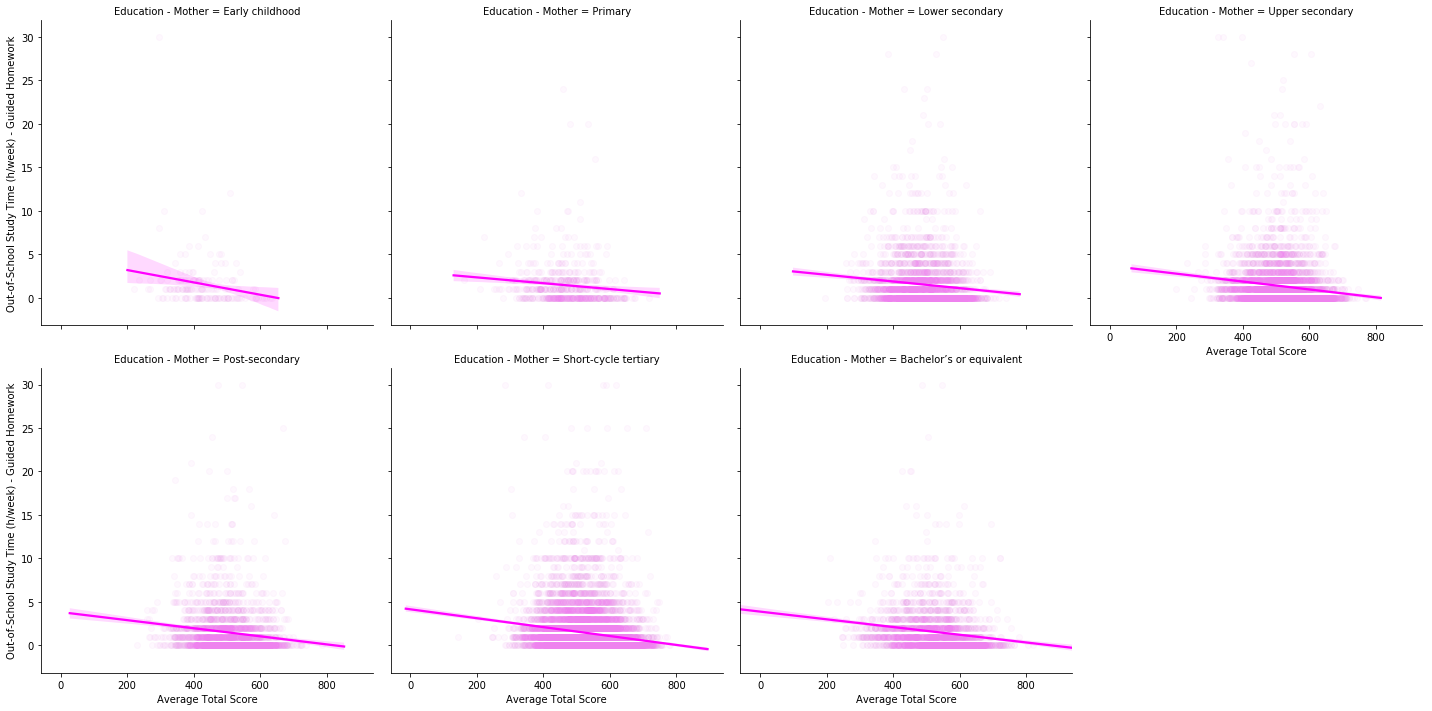

In [72]:
# Faceted scatter plot on levels of father's education 'Study Time - Guided Homework'
g = sb.FacetGrid(data = pisa, col = 'Education - Mother', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Total_Score', 'Out-of-School Study Time - Guided Homework', 
      color = 'violet', 
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'fuchsia'})
g.set_xlabels('Average Total Score')
g.set_ylabels('Out-of-School Study Time (h/week) - Guided Homework')

plt.show()

The connection between Guided Homework Study Time and the All out Score doesn't look great. Indeed, we see an unpretentious negative relationship for each Level of Education for the two Fathers and Mothers.

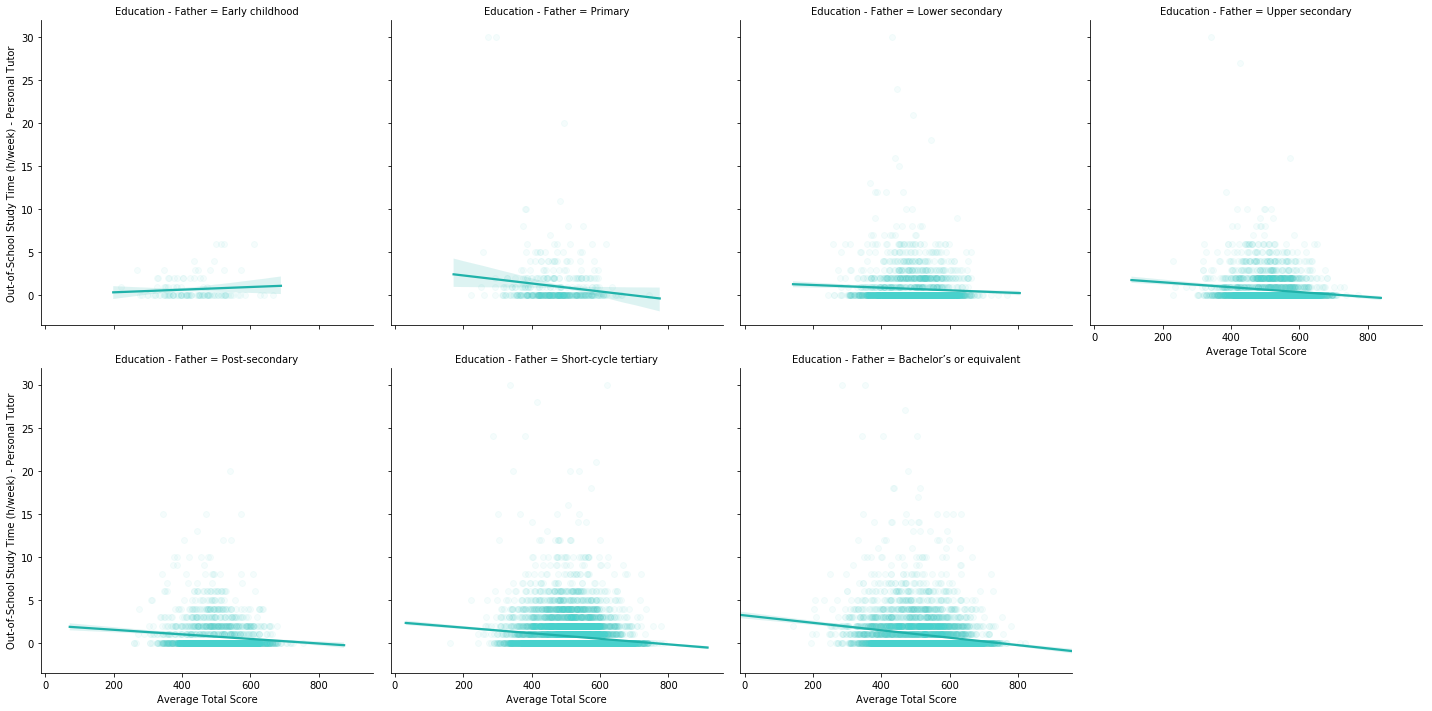

In [73]:
# Faceted scatter plot on levels of father's education 'Study Time - Personal Tutor'
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Total_Score', 'Out-of-School Study Time - Personal Tutor', 
      color = 'mediumturquoise', 
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'lightseagreen'})
g.set_xlabels('Average Total Score')
g.set_ylabels('Out-of-School Study Time (h/week) - Personal Tutor')

plt.show();

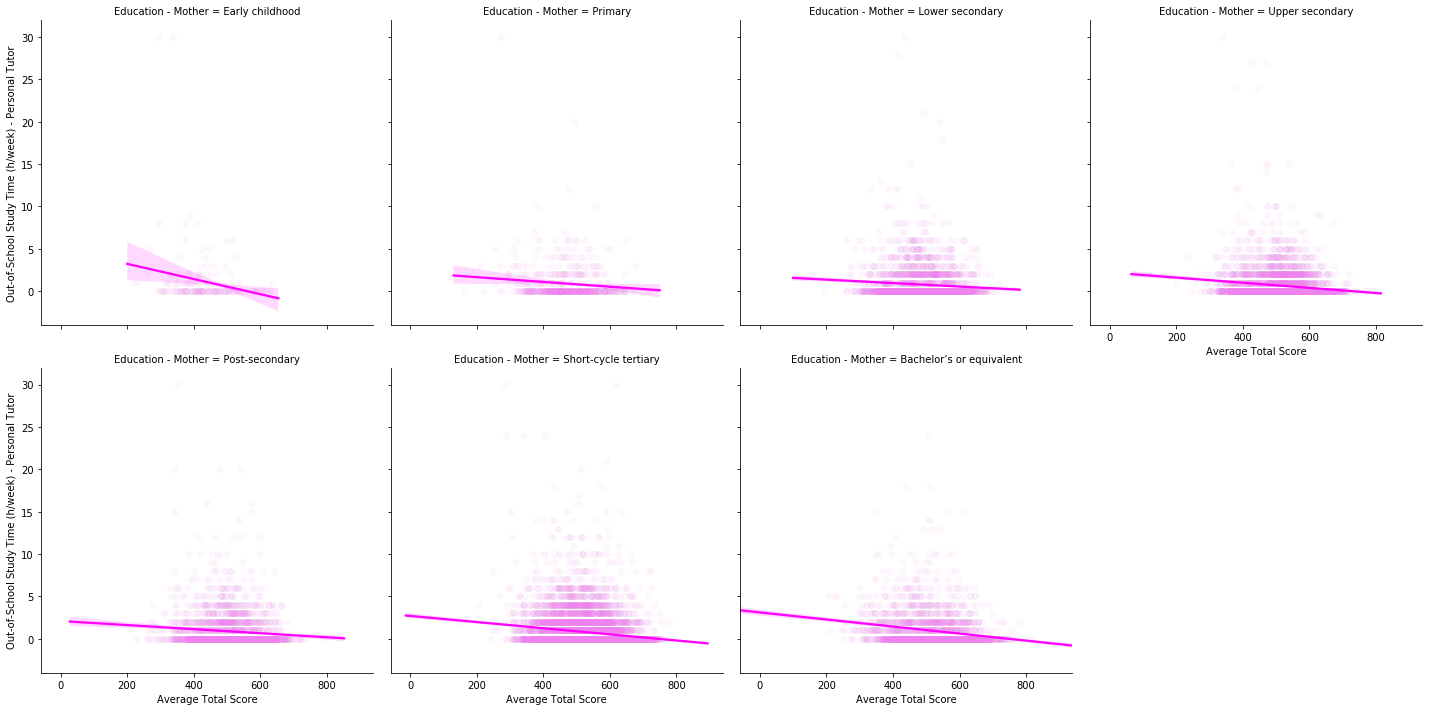

In [74]:
# Faceted scatter plot on levels of father's education 'Study Time - Personal Tutor'
g = sb.FacetGrid(data = pisa, col = 'Education - Mother', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Total_Score', 'Out-of-School Study Time - Personal Tutor', 
      color = 'violet', 
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'fuchsia'})
g.set_xlabels('Average Total Score')
g.set_ylabels('Out-of-School Study Time (h/week) - Personal Tutor')

plt.show();

The equivalent can be said for the Personal Tutors and Score. This could be obviously because of the way that students who need additional time with Personal Tutors are now the ones who battle, yet that is a case that is a little to enormous for this data investigation.

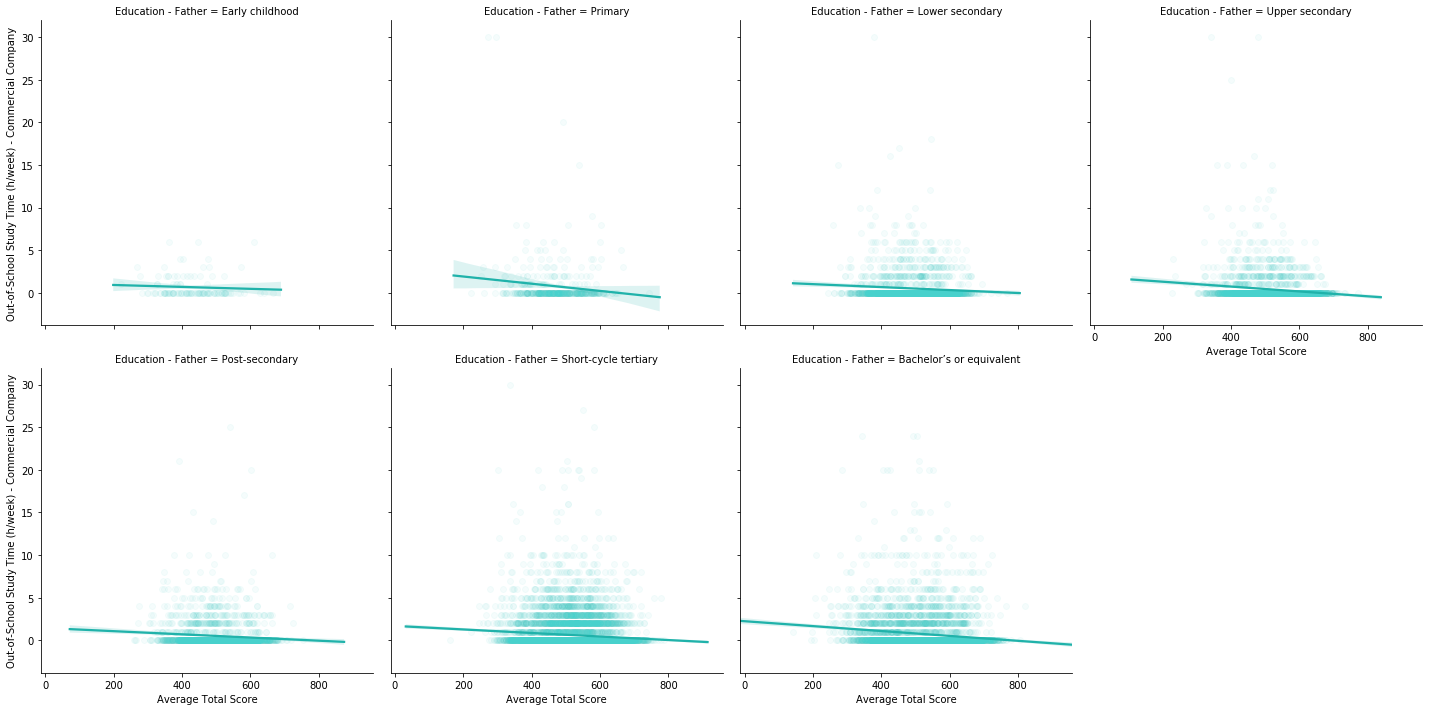

In [75]:
# Faceted scatter plot on levels of father's education 'Study Time - Commercial Company'
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Total_Score', 'Out-of-School Study Time - Commercial Company', 
      color = 'mediumturquoise', 
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'lightseagreen'})
g.set_xlabels('Average Total Score')
g.set_ylabels('Out-of-School Study Time (h/week) - Commercial Company')

plt.show();

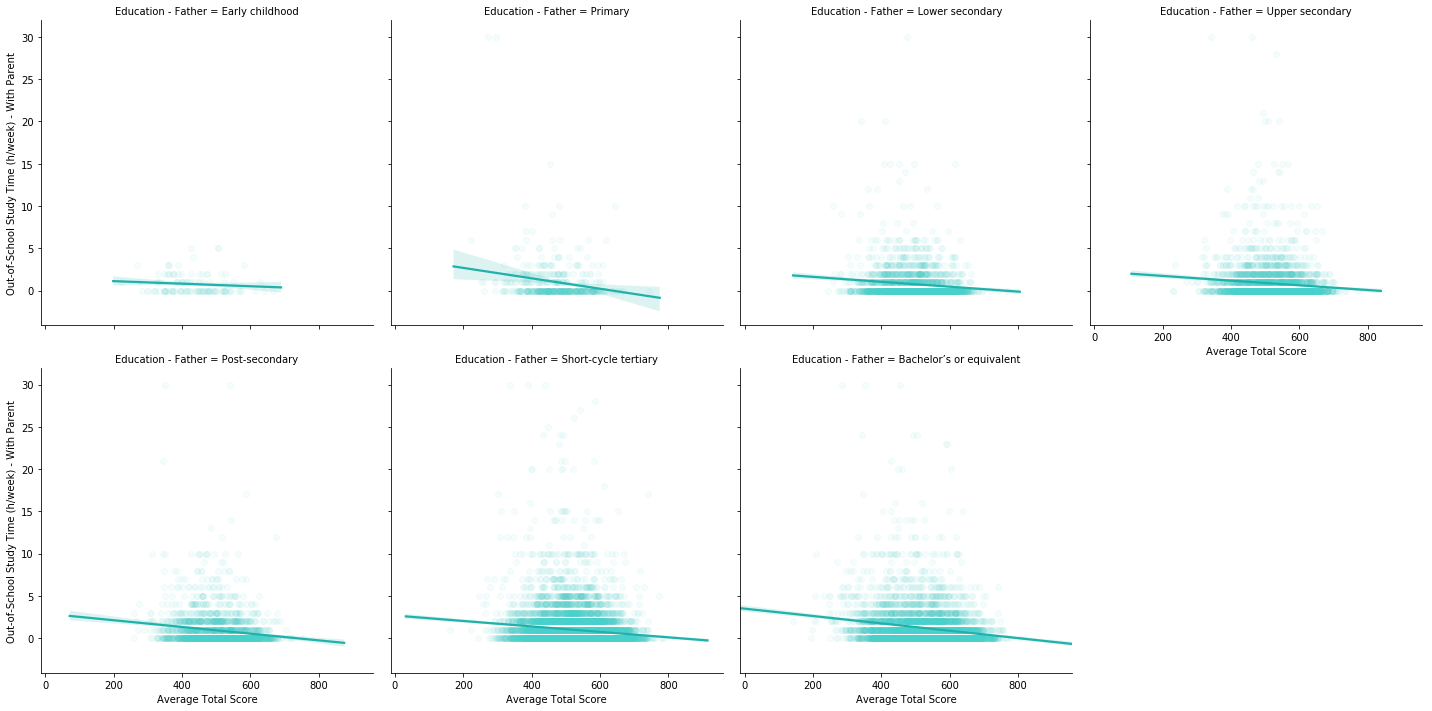

In [76]:
# Faceted scatter ploton levels of father's education 'Study Time - With Parent'
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Total_Score', 'Out-of-School Study Time - With Parent', 
      color = 'mediumturquoise', 
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'lightseagreen'})
g.set_xlabels('Average Total Score')
g.set_ylabels('Out-of-School Study Time (h/week) - With Parent')

plt.show();

For students Study Time with either a Commercial Company or with a Parent, we can see the very pattern that we saw for Guided Homework and Personal Tutor, so the need to see it applied to Fathers educational levels, just as the Mothers, isn't important. Indeed we can see a little negative connection, demonstrating that assuming the student requires more Study Time, it won't ensure a higher Score. 

Also, to wrap things up, the most encouraging variable of the Out-of-School Study Time gathering: Homework.

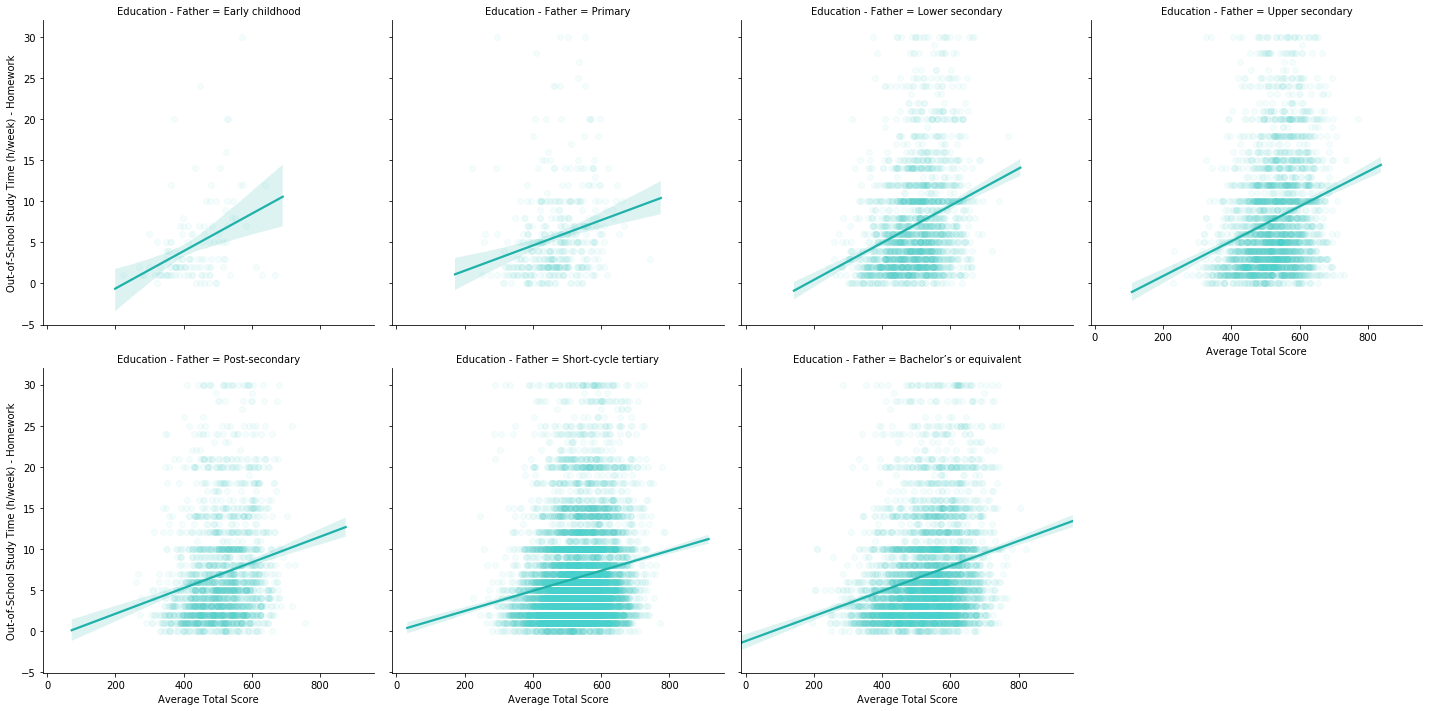

In [77]:
# Faceted scatter plot on levels of father's education 'Study Time - Homework'
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Total_Score', 'Out-of-School Study Time - Homework', color = 'mediumturquoise',
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'lightseagreen'})
g.set_xlabels('Average Total Score')
g.set_ylabels('Out-of-School Study Time (h/week) - Homework')

plt.show();

Here we have an extremely clear relationship that demonstrates that the additional time an student spends on Homework, the higher their Total Score will be. This is relevant for each educational level for the father, and it is a serious enormous differentiation to the wide range of various Out-of-School Study Time factors.

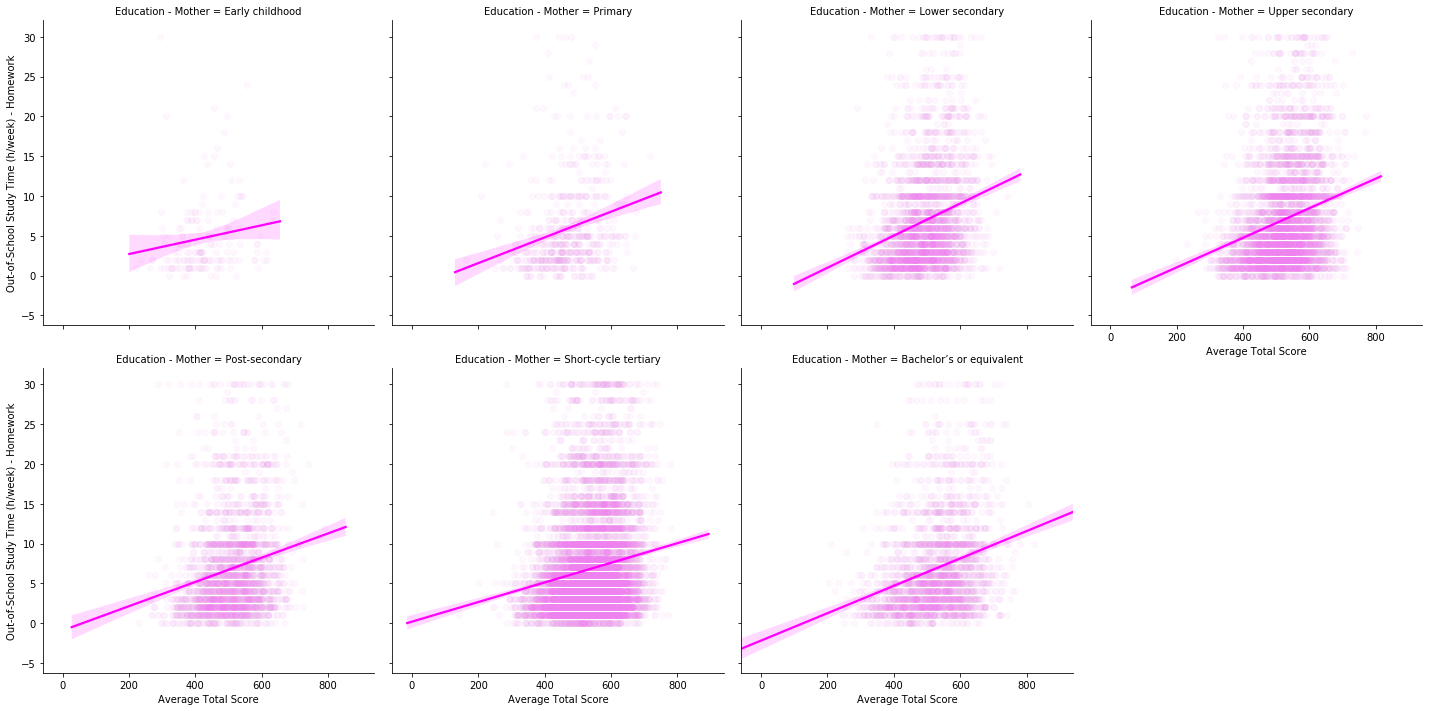

In [78]:
# Faceted scatter plot on levels of mather's education 'Study Time - Homework'
g = sb.FacetGrid(data = pisa, col = 'Education - Mother', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Total_Score', 'Out-of-School Study Time - Homework', color = 'violet',
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'fuchsia'})
g.set_xlabels('Average Total Score')
g.set_ylabels('Out-of-School Study Time (h/week) - Homework')

plt.show();

Similarly just like the case for the father, the mothers levels of education all demonstrate a similar positive connection between Homework related Study Time and Total Score. 

As a last investigation, we can take a gander at the fathers level of education in contrast with the three Scores that the Total Score is involved.

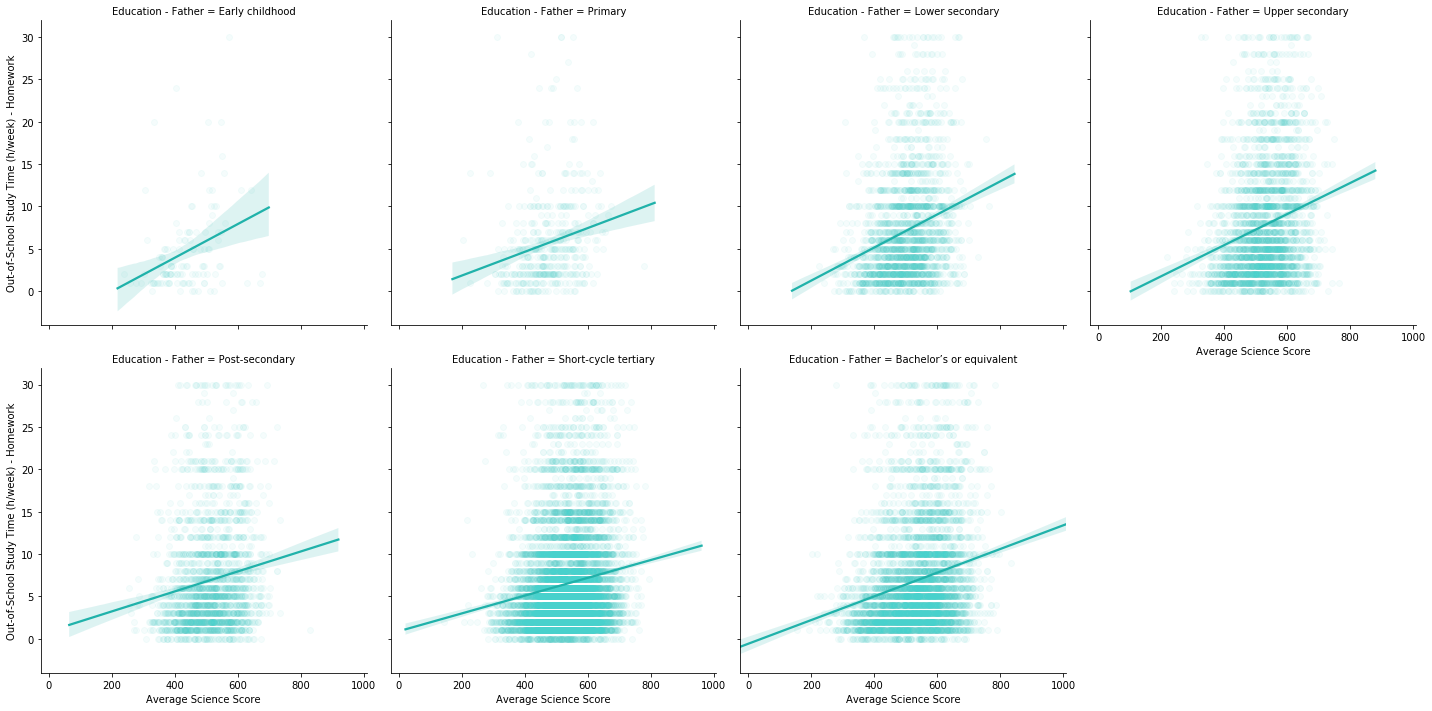

In [79]:
# Faceted scatter plot on levels of fathers education 'Average Science Score : Study Time - Homework'
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Science_Score', 'Out-of-School Study Time - Homework', color = 'mediumturquoise',
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'lightseagreen'})
g.set_xlabels('Average Science Score')
g.set_ylabels('Out-of-School Study Time (h/week) - Homework')

plt.show();

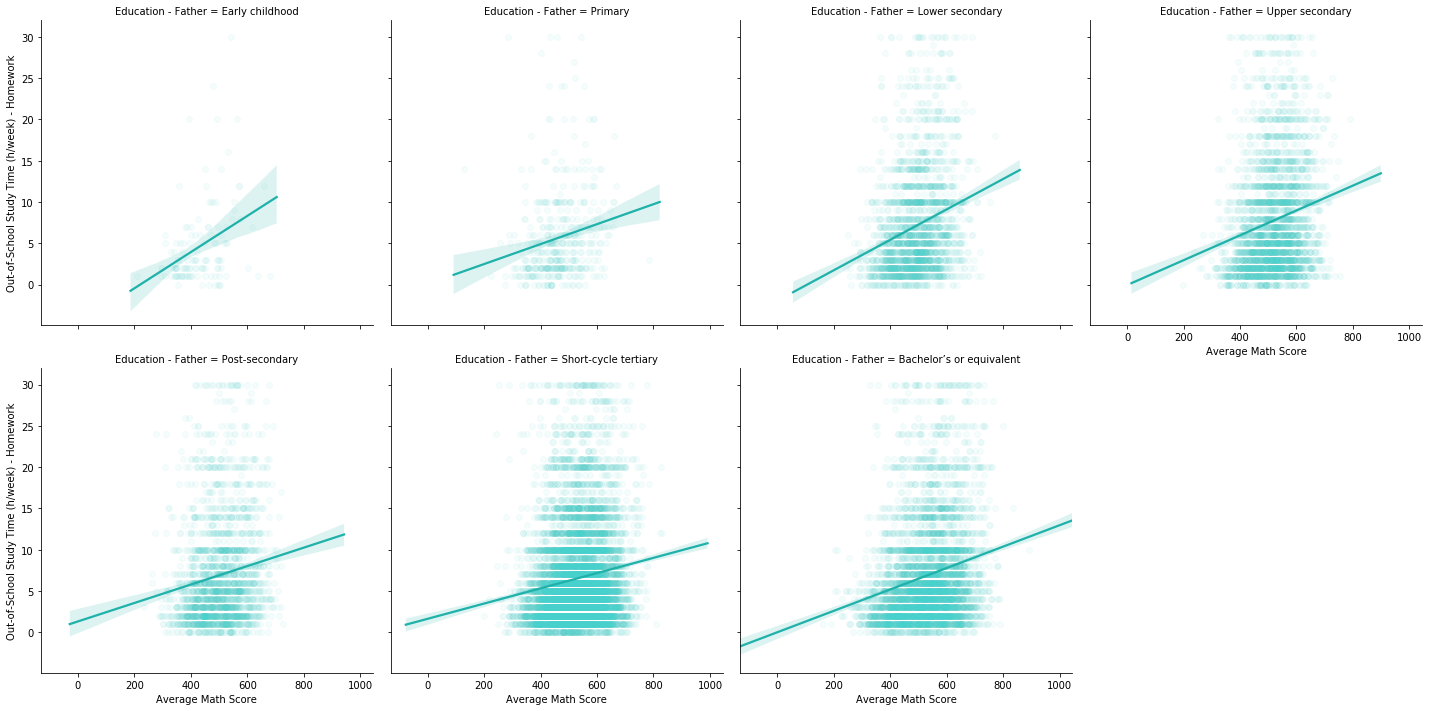

In [80]:
# Faceted scatter plot on levels of father's education 'Average Math Score : Study Time - Homework'
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Math_Score', 'Out-of-School Study Time - Homework', color = 'mediumturquoise',
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'lightseagreen'})
g.set_xlabels('Average Math Score')
g.set_ylabels('Out-of-School Study Time (h/week) - Homework')

plt.show();

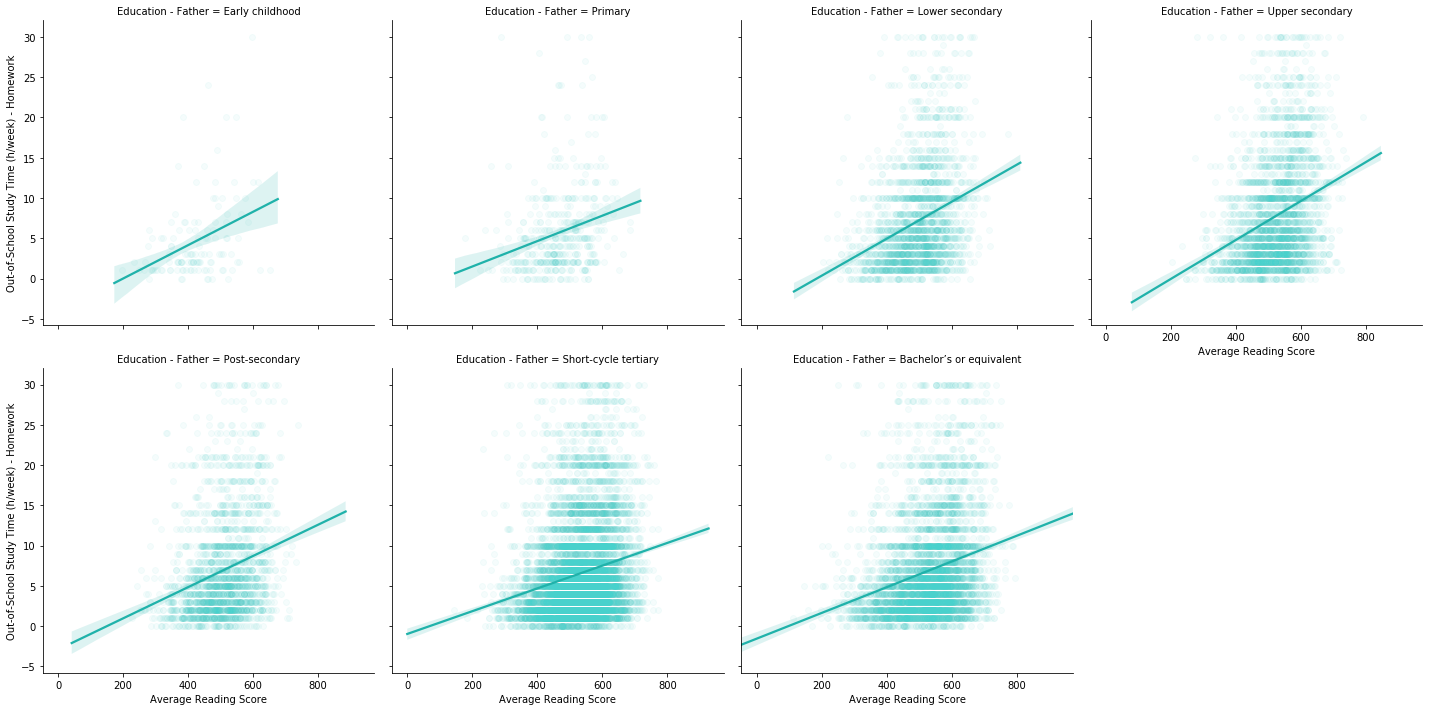

In [81]:
# Faceted scatter plot on levels of father's education 'Average Reading Score : Study Time - Homework'
g = sb.FacetGrid(data = pisa, col = 'Education - Father', col_wrap = 4, height = 5)
g.map(sb.regplot, 'Average_Reading_Score', 'Out-of-School Study Time - Homework', color = 'mediumturquoise',
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": 'lightseagreen'})
g.set_xlabels('Average Reading Score')
g.set_ylabels('Out-of-School Study Time (h/week) - Homework')
plt.show();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

All through this part, we examined further into what sort of impact parental education has on the scores of the students. Specifically, we got going by checking whether there was a distinction between the gender of an student and how well they scored, comparable to their parental level of education. For both mother's and father's level of education, we saw consistency between the genders with the exception of extremely irrelevant contrasts.

Then, we proceeded to see the connection between Learning Times and their particular subjects. As we found in the bivariate Analysis, Learning Time spent on Science had the best results, however there was a trick. I will proceed with this point in the inquiry underneath. Concerning the rest, the relationship was immaterial and no relationship could be set up.

Lastly, we took a gander at the connection between the Out-of-School Study Times and the Average Total Scores. This was similarly insignificant for all classes with the exception of one: Homework. We proceeded to see Homework in contrast with every one of the scores that the Average Total Score  was made out of, and the positive relationship endured. I would in any case order it as a frail relationship, however it all things considered was there.

### Were there any interesting or surprising interactions between features?

The most striking finding was the distinction between students scores across parental levels of education when contrasting with Learning Time for Science. It showed that in spite of the fact that learning time for Science appears as though a variable that would expand an students score in Science, we can't accept that it is the situation for students altogether conditions. We found that for students with parents of lower educational levels, investing more energy in school learning Science related themes didn't have the positive connection that we saw with the scores for the students with parents of higher educational levels. Accordingly, students who invested more energy learning science in school possibly had an obvious advantage when their parents had post-secondary education or higher.